In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('happiness_data.csv')

In [6]:
pd.pandas.set_option('display.max_columns',None)

# Data Summarization

In [7]:
df.shape

(1949, 11)

In [8]:
df.head(100)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
95,Azerbaijan,2008,4.817,9.465,0.684,62.64,0.601,-0.029,0.715,0.578,0.227
96,Azerbaijan,2009,4.574,9.534,0.736,63.02,0.498,-0.087,0.754,0.544,0.234
97,Azerbaijan,2010,4.219,9.569,0.687,63.40,0.501,-0.123,0.858,0.527,0.272
98,Azerbaijan,2011,4.680,9.540,0.725,63.64,0.537,-0.105,0.795,0.536,0.258


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


# Categorical Features

In [10]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
print('Categorical attributes are:')
for i in categorical_features:
    print(i)
print('Number of Categorical features in dataset: ',len(categorical_features))

Categorical attributes are:
Country name
Number of Categorical features in dataset:  1


# Numerical Features

In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Numeric attributes are:')
for i in numerical_features:
    print(i)
print('Number of numerical features in dataset: ',len(numerical_features))

Numeric attributes are:
year
Life Ladder
Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect
Number of numerical features in dataset:  10


# Discrete Features

In [13]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]

print('Discrete Numeric attributes are:')
for i in discrete_feature:
    print(i)
print('Number of Discrete features in dataset: ',len(discrete_feature))

Discrete Numeric attributes are:
year
Number of Discrete features in dataset:  1


# Continuous Features

In [14]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

print('Continuous Numeric attributes are:')
for i in continuous_feature:
    print(i)

print('Number of Continuous features in dataset: ',len(continuous_feature))

Continuous Numeric attributes are:
Life Ladder
Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect
Number of Continuous features in dataset:  9


# Question A:
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?


The dataset , "happiness_data.csv," is related to the measurement of happiness and various factors that contribute to it across different countries and years.
There are 11 features/attributes and 1949 number of observations/rows in the dataset.

Categorical Attributes:
Categorical attributes are qualitative in nature and represent information that falls into distinct categories or groups. In the given dataset, the categorical attribute is "Country name," where each entry corresponds to the name of a specific country. Categorical attributes are typically represented as string objects in the dataset.

Numerical Attributes:
Numerical attributes represent quantitative data and can be further divided into two subtypes: discrete numerical and continuous numerical.

Discrete Numerical Attributes:
Discrete numerical attributes have a finite number of distinct values or intervals between values. These attributes are often used to represent countable data. To determine if an attribute is discrete, we utilize a logic based on the count of unique values. If the count of unique values for a numeric attribute is less than a predetermined threshold (25 in our case), it is considered a discrete numerical attribute. In our dataset, "Year" is considered a discrete numerical attribute.

Continuous Numerical Attributes:

Continuous numerical attributes, in contrast, have an infinite number of possible values within a given range. They represent measurements on a continuous scale. In the given dataset, attributes such as
Life Ladder, 
Log GDP per capita, 
Social support, 
Healthy life expectancy at birth, 
Freedom to make life choices, 
Generosity, 
Perceptions of corruption, 
Positive affect, and
Negative affect
are all considered continuous numerical attributes. These attributes can take on a wide range of values and are treated as continuous variables in our analysis.



# Visualization and summary Statistics

In [11]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


# Null Data Check

In [15]:
## Here we will check the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean()* 100, 4),  ' % missing values')

Log GDP per capita 1.8471  % missing values
Social support 0.667  % missing values
Healthy life expectancy at birth 2.822  % missing values
Freedom to make life choices 1.6419  % missing values
Generosity 4.5664  % missing values
Perceptions of corruption 5.6439  % missing values
Positive affect 1.1288  % missing values
Negative affect 0.8209  % missing values


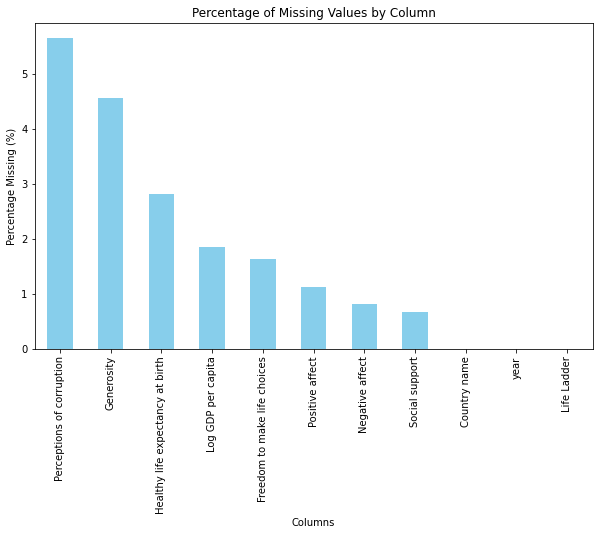

In [16]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=90)
plt.show()

Since there are many missing value let us find relationship between missing values and target variable

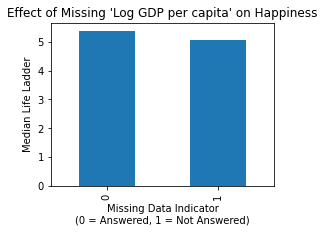

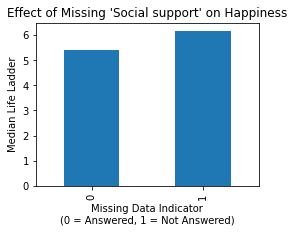

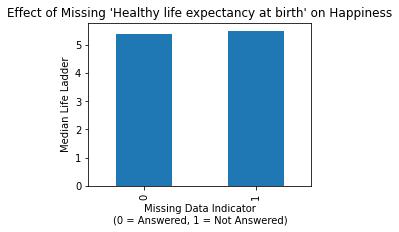

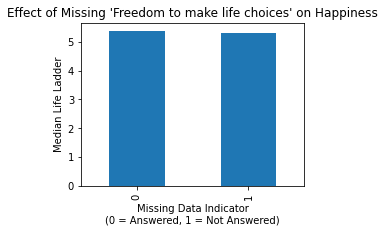

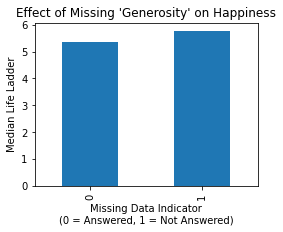

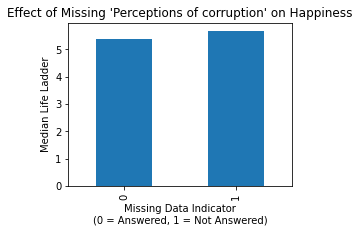

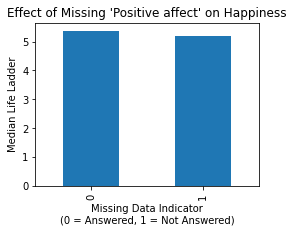

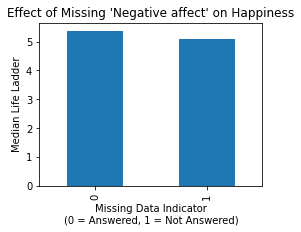

In [17]:
import matplotlib.pyplot as plt

for feature in features_with_na:
    data = df.copy()
    
    data[feature] = np.where(data[feature].isnull(), 1, 0)

    median_life_ladder = data.groupby(feature)['Life Ladder'].median()
    
    plt.figure(figsize=(4,3))     
    ax = median_life_ladder.plot.bar()
    
 
    plt.title(f"Effect of Missing '{feature}' on Happiness")
    plt.xlabel(f"Missing Data Indicator\n(0 = Answered, 1 = Not Answered)")
    plt.ylabel("Median Life Ladder")
    
   
    plt.show()


The above graphs show that missing values do affect the target columns so we will try to impute the missing values in the feature Engineering section

# Histograms

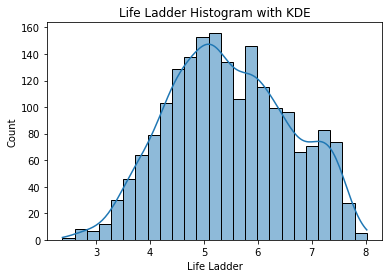

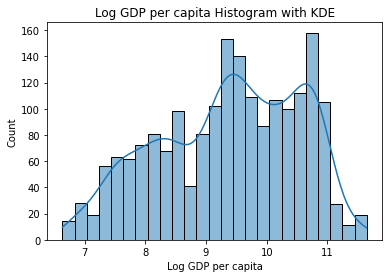

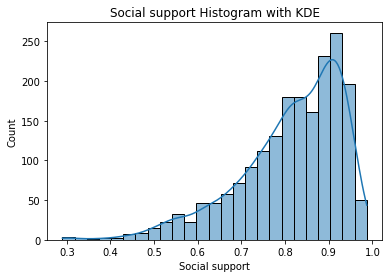

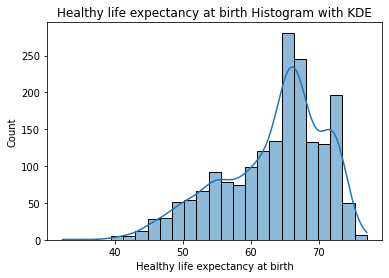

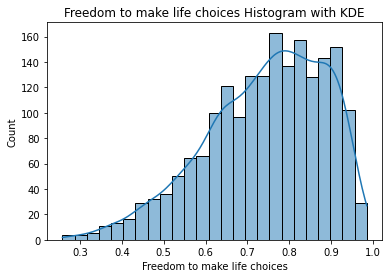

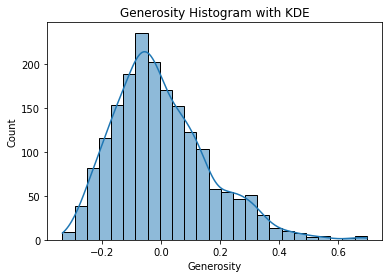

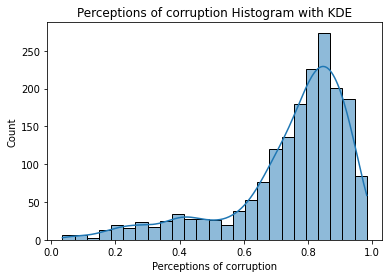

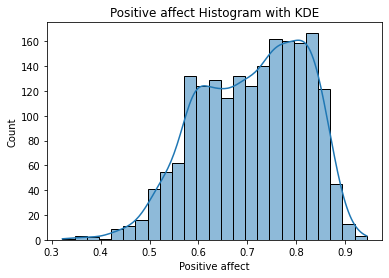

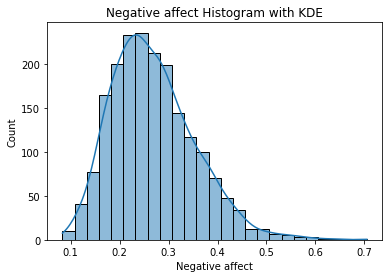

In [18]:

for feature in continuous_feature:
    data = df.copy()
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'{feature} Histogram with KDE')
    
    # Show the plot
    plt.show()

# Checking for Outliers

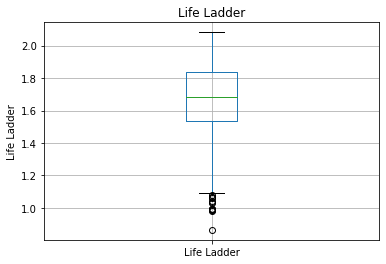

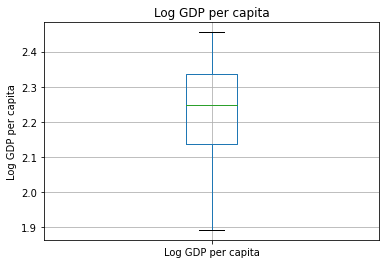

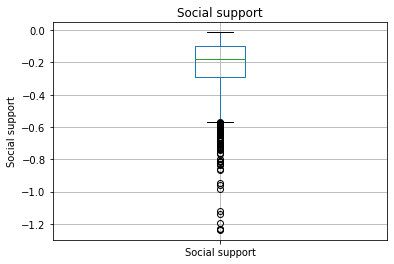

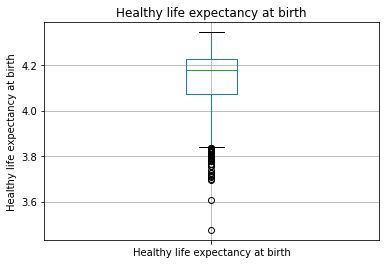

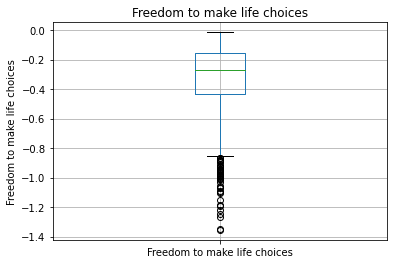

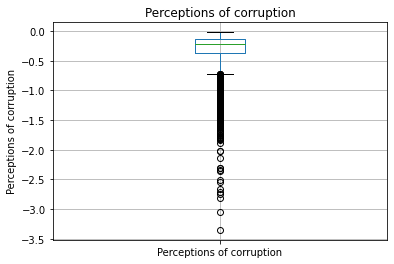

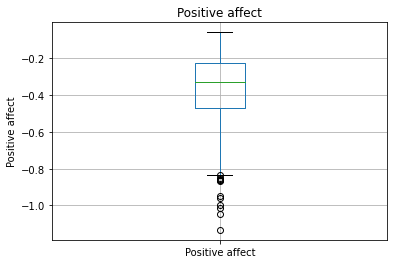

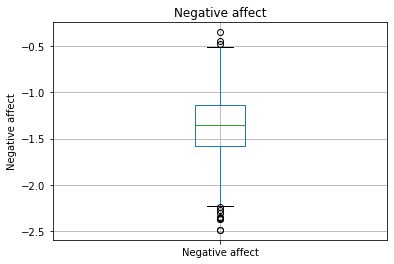

In [19]:
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

# Question B
Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Please find above the various statistical values of the attributes and the histogram plots.

Notable Traits:
From the above histograms of various features, it can be seen that the distributions are not normal. There are multi modal distributions. 
Also there is skewness in the data. The histograms of Negative effect looks somewhat normal.
From the above box plots, it can be seen that we have high number of outliers for:
Social Support, 
Health Life Expectancy at Birth, 
Freedom to make life choices, and
Perception of Corruption
followed by negative affect and positive affect

Special Treatment:
We can take logarithm of the data as we observe skewness or a lack of normality in the distributions of features.We have performed Null data Analysis above to check the null data in dataset and its impact on the target variable.
We need to handle the null data, as there is not much null data in the data set and not much affect of it individually on the target variable,we will be imputing missing values with the mean of the respective country's values,  maintaining the context of the data and take into account the country-specific trends or characteristics.
We have country name as the categorical feature so will be encoding it (one hot encoding) for modelling. We would be standardizing the data (numeric features) to have a standard scale for all the attributes




# Outlier Handling
Detect Outliers:

Calculate the IQR for each continuous feature.
Identify the upper and lower bounds to determine the outlier range.
Remove Outliers:

Remove data points that fall outside the outlier range.


In [21]:
import numpy as np
import pandas as pd
data = df.copy()
outliers = {}

for feature in continuous_feature:
    if 0 in data[feature].unique():
        continue  
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outliers[feature] = feature_outliers.index.tolist()
all_outliers_indices = [index for indices in outliers.values() for index in indices]
unique_outliers_indices = list(set(all_outliers_indices))
data = data.drop(unique_outliers_indices)


# Histograms with and without log Transformations

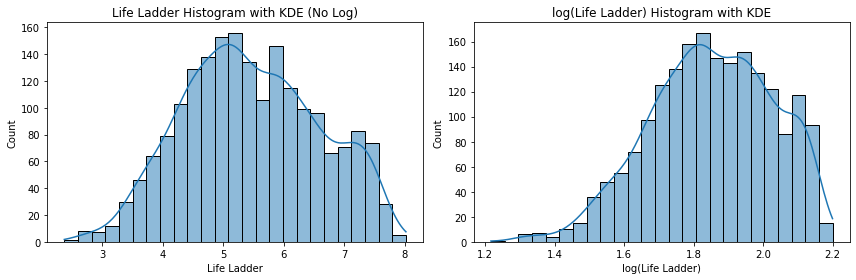

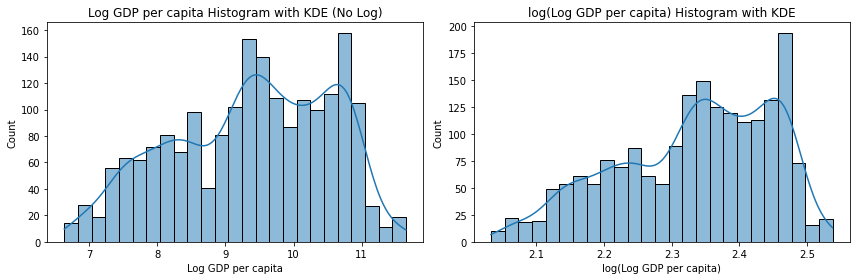

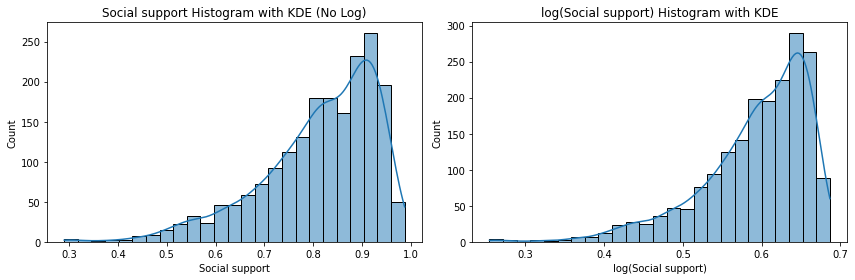

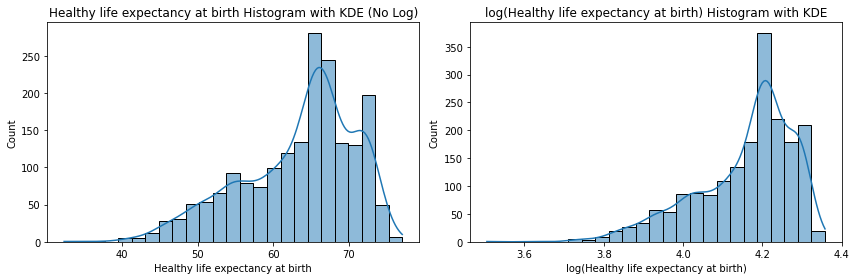

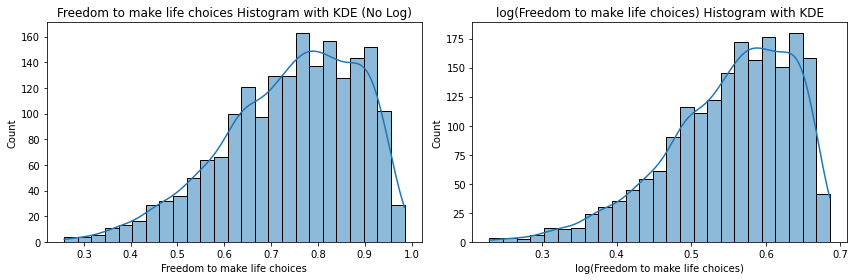

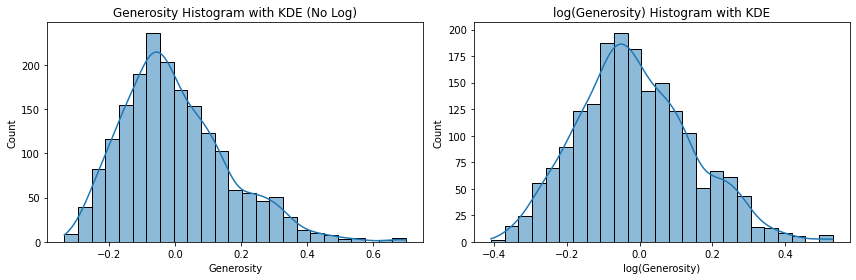

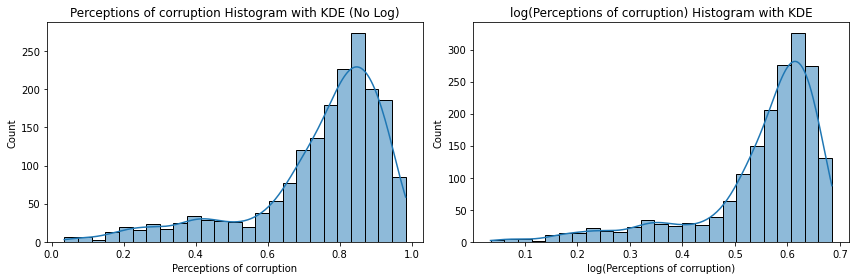

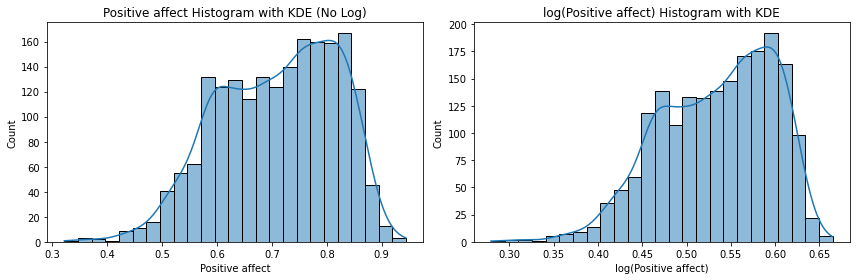

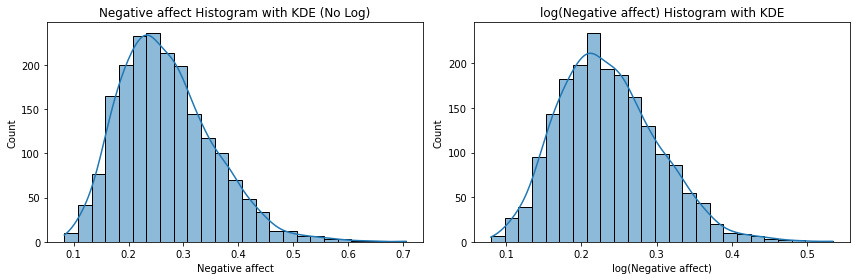

In [22]:
import numpy as np

for feature in continuous_feature:
    data = df.copy()
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f'{feature} Histogram with KDE (No Log)')
    
    # Plot the histogram with log transformation
    plt.subplot(1, 2, 2)
    data[feature] = np.log1p(data[feature])
    sns.histplot(data=data, x=feature, kde=True, bins=25)
    plt.xlabel(f'log({feature})')
    plt.ylabel("Count")
    plt.title(f'log({feature}) Histogram with KDE')
    
    # Show the plots side by side
    plt.tight_layout()
    plt.show()


As it can be observed that the histograms of both the original (non-log-transformed) data and the log-transformed data look  similar with not much change, it suggests that taking the logarithm of these particular features may not significantly impact their distribution. In this case, log transformation may not provide substantial benefits for normalizing the data or reducing the impact of extreme values (skewness).

# Handling Null Values

In [23]:
df['Generosity'] = df.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.mean()))
df['Freedom to make life choices'] = df.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.mean()))
df['Perceptions of corruption'] = df.groupby('Country name')['Perceptions of corruption'].transform(lambda x: x.fillna(x.mean()))
df['Positive affect']=df.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.mean()))
df['Negative affect']=df.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.mean()))
df['Healthy life expectancy at birth']=df.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.mean()))
df['Log GDP per capita']=df.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.mean()))
df['Social support']=df.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))


In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().mean()*100

Country name                        0.0
year                                0.0
Life Ladder                         0.0
Log GDP per capita                  0.0
Social support                      0.0
Healthy life expectancy at birth    0.0
Freedom to make life choices        0.0
Generosity                          0.0
Perceptions of corruption           0.0
Positive affect                     0.0
Negative affect                     0.0
dtype: float64

# Question C:
Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

# Correlation Matrix

C:\Users\Prem Amal\AppData\Local\Temp\ipykernel_16984\2980460811.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


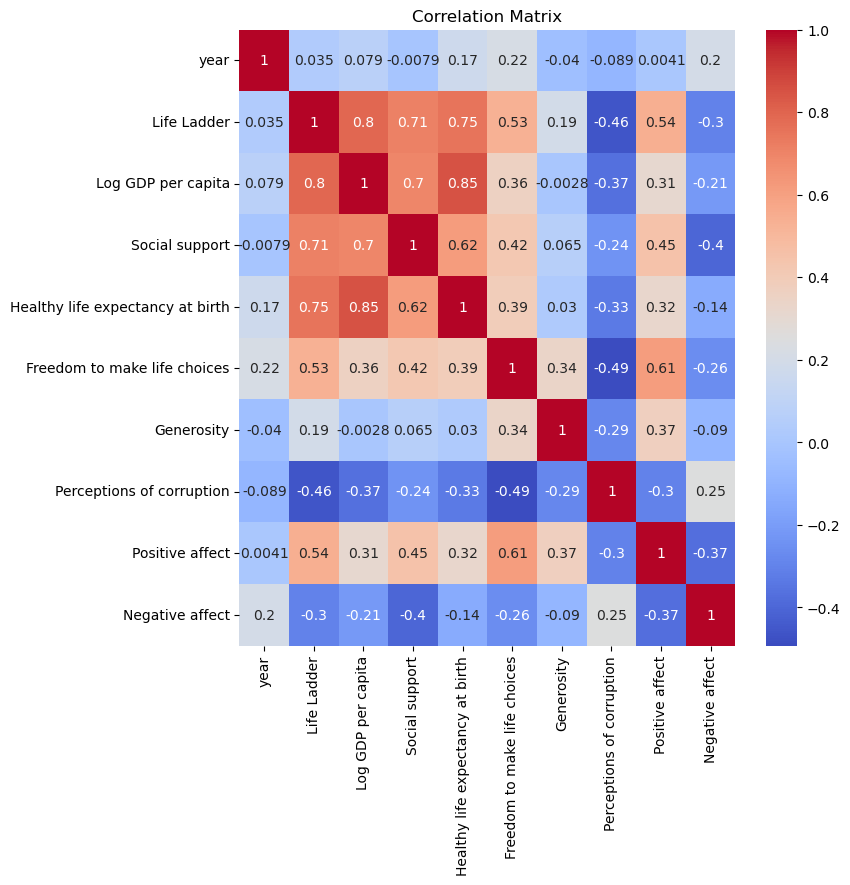

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
import pandas as pd

correlation_matrix = df.corr().abs()  

highly_correlated_pairs = []


for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] >= 0.65:
            attribute1 = correlation_matrix.columns[i]
            attribute2 = correlation_matrix.columns[j]
            highly_correlated_pairs.append((attribute1, attribute2,correlation_matrix.iloc[i, j]))


for pair in highly_correlated_pairs:
    print("Highly correlated pair:", pair)


Highly correlated pair: ('Life Ladder', 'Log GDP per capita', 0.7956462417675243)
Highly correlated pair: ('Life Ladder', 'Social support', 0.7116451006619269)
Highly correlated pair: ('Life Ladder', 'Healthy life expectancy at birth', 0.7500515575349185)
Highly correlated pair: ('Log GDP per capita', 'Social support', 0.6951515806100237)
Highly correlated pair: ('Log GDP per capita', 'Healthy life expectancy at birth', 0.8501003131393726)


C:\Users\Prem Amal\AppData\Local\Temp\ipykernel_16984\707597841.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().abs()



The correlation matrix reveals notable relationships within the dataset. The absolute value of correlation coefficient greater than 0.65 is assumed to be strong corelation.Notably, certain features exhibit strong correlations with the target variable, Life Ladder. Specifically, Life Ladder demonstrates a significant positive correlation of 0.79 with Log GDP per capita, 0.71 with Social Support, and 0.75 with Healthy life expectancy at birth.
Additionally, it's evident that some attributes are highly correlated with each other. For instance, Log GDP per capita displays correlations of 0.69 with Social support and a remarkably high correlation of 0.85 with Healthy life expectancy at birth.

Given the high correlations among features, several actions can be taken
Feature Selection: We can choose to retain only one feature from each highly correlated pair, eliminating redundancy based on domain knowledge or feature relevance.

Feature Transformation: Alternatively, we can transform correlated features into new ones that capture shared information, such as creating averages or weighted averages.

Dimensionality Reduction: If numerous highly correlated features exist, dimensionality reduction techniques like PCA or Factor Analysis can be applied to reduce dataset complexity while preserving valuable information.

Experimentation: By experimenting with various feature selection and engineering techniques, we can determine the most effective approach for our specific analysis or modeling task.

# Scatter Plots

# Studying cause and effect of Target variable and other features

C:\Users\Prem Amal\AppData\Local\Temp\ipykernel_16984\1808315769.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


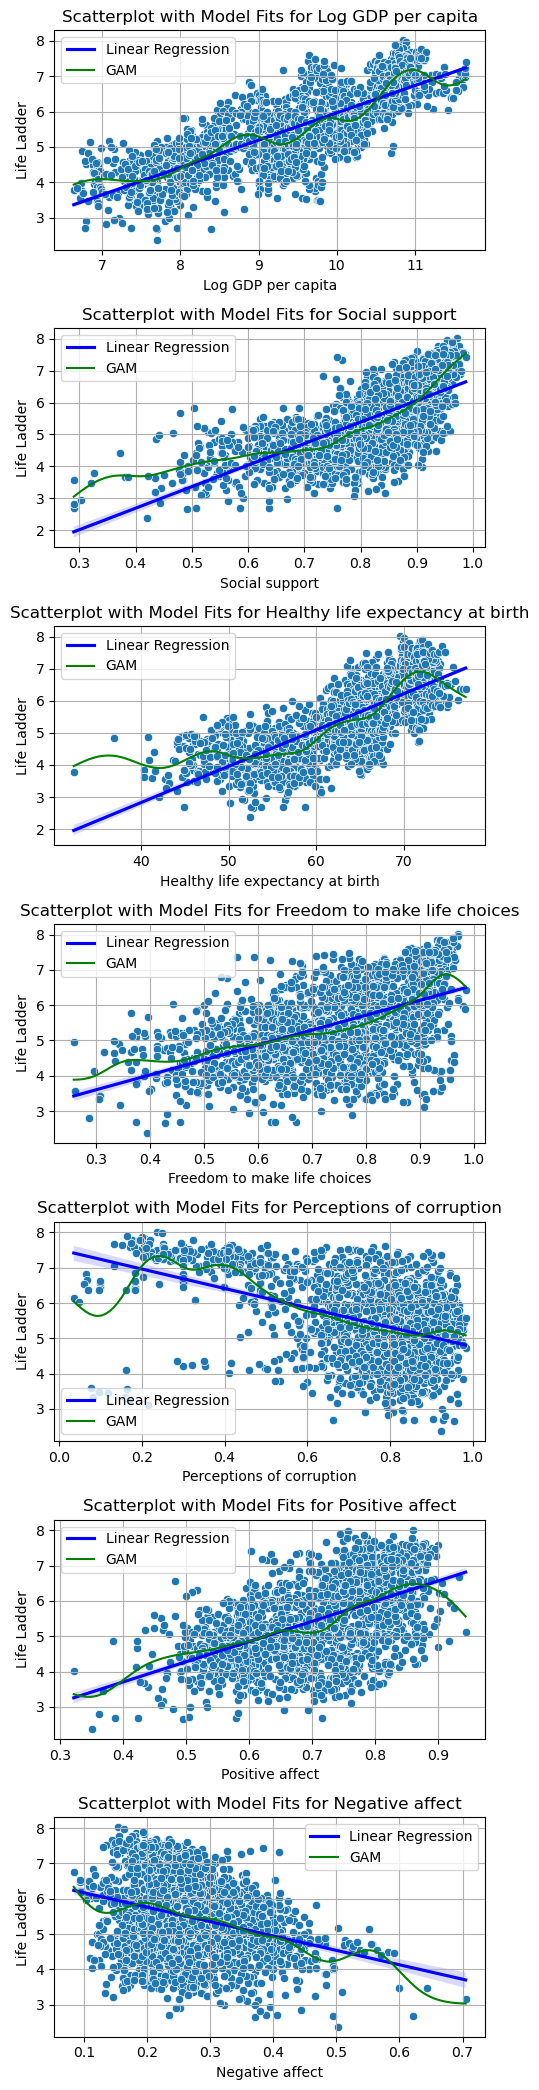

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import LinearGAM



correlation_matrix = df.corr()
pcc_with_label = correlation_matrix['Life Ladder'].drop('Life Ladder')  
significant_attributes = pcc_with_label[abs(pcc_with_label) > 0.2]  

fig, axes = plt.subplots(nrows=len(significant_attributes), ncols=1, figsize=(5, 3 * len(significant_attributes)))

for i, attr in enumerate(significant_attributes.index):
    sns.scatterplot(data=df, x=attr, y='Life Ladder', ax=axes[i])
    X = df[[attr]]
    y = df['Life Ladder']
    
    # Linear Regression
    sns.regplot(x=attr, y='Life Ladder', data=df, scatter=False, color='blue', ax=axes[i], label='Linear Regression')
    
    # GAM
    gam = LinearGAM().fit(X, y)
    X_grid = gam.generate_X_grid(term=0)
    y_pred = gam.predict(X_grid)
    axes[i].plot(X_grid, y_pred, color='green', label='GAM')
    
    axes[i].legend()
    axes[i].set_xlabel(attr)
    axes[i].set_ylabel('Life Ladder')
    axes[i].set_title(f'Scatterplot with Model Fits for {attr}')
    axes[i].grid(True)
   
plt.tight_layout()
plt.show()


From the above scatter plots, we can observe instances like Life Ladder with Log GDP per capita, social support and health life expectancy ,where there is a clear linear relationship between the feature and the target variable. In these cases, the presence of a linear regression line indicates a straightforward, direct association. The direction of the line's slope (whether it's positive or negative) informs us whether the relationship is positive or negative.

Also,they exhibit a more complex pattern. The presence of a wavy or curved Generalized Additive Model (GAM) line suggests that the relationship is not strictly linear. Instead, it may involve intricate dynamics, such as quadratic or higher-order relationships, or interactions between variables. This signifies that the impact of the feature on the target variable is not uniform.Across the scatter plots, we can discern clusters of data points that either cluster above or below the lines. These clusters hint at the presence of distinct groups or subpopulations within the dataset. Different factors may be influencing the relationship in unique ways for these subsets of data, leading to divergent patterns.

Some scatter plots reveal outliers—data points that markedly deviate from the general trend. These outliers indicate unusual or extreme observations that warrant special attention and investigation. Outliers can exert a notable influence on the fit of both linear regression and GAM models, potentially impacting model accuracy.
Additionally, we may identify cases where data points concentrate above or below the line following a specific threshold value of the feature. This observation suggests a threshold effect, where there is a critical point at which the relationship with the target variable undergoes a substantial change. Understanding this threshold can be crucial for drawing meaningful conclusions.

# Preparing Dataset for Machine Learning Algorithms

In [26]:
df = pd.get_dummies(df, columns=['Country name'], drop_first=True)

In [27]:
df.head(10)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country name_Albania,Country name_Algeria,Country name_Angola,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,Country name_Belarus,Country name_Belgium,Country name_Belize,Country name_Benin,Country name_Bhutan,Country name_Bolivia,Country name_Bosnia and Herzegovina,Country name_Botswana,Country name_Brazil,Country name_Bulgaria,Country name_Burkina Faso,Country name_Burundi,Country name_Cambodia,Country name_Cameroon,Country name_Canada,Country name_Central African Republic,Country name_Chad,Country name_Chile,Country name_Colombia,Country name_Comoros,Country name_Congo (Brazzaville),Country name_Congo (Kinshasa),Country name_Costa Rica,Country name_Croatia,Country name_Cyprus,Country name_Czech Republic,Country name_Denmark,Country name_Djibouti,Country name_Dominican Republic,Country name_Ecuador,Country name_Egypt,Country name_El Salvador,Country name_Estonia,Country name_Ethiopia,Country name_Finland,Country name_France,Country name_Gabon,Country name_Gambia,Country name_Georgia,Country name_Germany,Country name_Ghana,Country name_Greece,Country name_Guatemala,Country name_Guinea,Country name_Guyana,Country name_Haiti,Country name_Honduras,Country name_Hungary,Country name_Iceland,Country name_India,Country name_Indonesia,Country name_Iran,Country name_Iraq,Country name_Ireland,Country name_Israel,Country name_Italy,Country name_Ivory Coast,Country name_Jamaica,Country name_Japan,Country name_Jordan,Country name_Kazakhstan,Country name_Kenya,Country name_Kuwait,Country name_Kyrgyzstan,Country name_Laos,Country name_Latvia,Country name_Lebanon,Country name_Lesotho,Country name_Liberia,Country name_Libya,Country name_Lithuania,Country name_Luxembourg,Country name_Madagascar,Country name_Malawi,Country name_Malaysia,Country name_Mali,Country name_Malta,Country name_Mauritania,Country name_Mauritius,Country name_Mexico,Country name_Moldova,Country name_Mongolia,Country name_Montenegro,Country name_Morocco,Country name_Mozambique,Country name_Myanmar,Country name_Namibia,Country name_Nepal,Country name_Netherlands,Country name_New Zealand,Country name_Nicaragua,Country name_Niger,Country name_Nigeria,Country name_North Macedonia,Country name_Norway,Country name_Pakistan,Country name_Palestinian Territories,Country name_Panama,Country name_Paraguay,Country name_Peru,Country name_Philippines,Country name_Poland,Country name_Portugal,Country name_Qatar,Country name_Romania,Country name_Russia,Country name_Rwanda,Country name_Saudi Arabia,Country name_Senegal,Country name_Serbia,Country name_Sierra Leone,Country name_Singapore,Country name_Slovakia,Country name_Slovenia,Country name_South Africa,Country name_South Korea,Country name_Spain,Country name_Sri Lanka,Country name_Sudan,Country name_Suriname,Country name_Swaziland,Country name_Sweden,Country name_Switzerland,Country name_Syria,Country name_Taiwan Province of China,Country name_Tajikistan,Country name_Tanzania,Country name_Thailand,Country name_Togo,Country name_Trinidad and Tobago,Country name_Tunisia,Country name_Turkey,Country name_Uganda,Country name_Ukraine,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2009,4.402,7.540,0.552,

In [28]:
df.drop(columns=['year'], inplace=True)

In [29]:
df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Country name_Albania,Country name_Algeria,Country name_Angola,Country name_Argentina,Country name_Armenia,Country name_Australia,Country name_Austria,Country name_Azerbaijan,Country name_Bahrain,Country name_Bangladesh,Country name_Belarus,Country name_Belgium,Country name_Belize,Country name_Benin,Country name_Bhutan,Country name_Bolivia,Country name_Bosnia and Herzegovina,Country name_Botswana,Country name_Brazil,Country name_Bulgaria,Country name_Burkina Faso,Country name_Burundi,Country name_Cambodia,Country name_Cameroon,Country name_Canada,Country name_Central African Republic,Country name_Chad,Country name_Chile,Country name_Colombia,Country name_Comoros,Country name_Congo (Brazzaville),Country name_Congo (Kinshasa),Country name_Costa Rica,Country name_Croatia,Country name_Cyprus,Country name_Czech Republic,Country name_Denmark,Country name_Djibouti,Country name_Dominican Republic,Country name_Ecuador,Country name_Egypt,Country name_El Salvador,Country name_Estonia,Country name_Ethiopia,Country name_Finland,Country name_France,Country name_Gabon,Country name_Gambia,Country name_Georgia,Country name_Germany,Country name_Ghana,Country name_Greece,Country name_Guatemala,Country name_Guinea,Country name_Guyana,Country name_Haiti,Country name_Honduras,Country name_Hungary,Country name_Iceland,Country name_India,Country name_Indonesia,Country name_Iran,Country name_Iraq,Country name_Ireland,Country name_Israel,Country name_Italy,Country name_Ivory Coast,Country name_Jamaica,Country name_Japan,Country name_Jordan,Country name_Kazakhstan,Country name_Kenya,Country name_Kuwait,Country name_Kyrgyzstan,Country name_Laos,Country name_Latvia,Country name_Lebanon,Country name_Lesotho,Country name_Liberia,Country name_Libya,Country name_Lithuania,Country name_Luxembourg,Country name_Madagascar,Country name_Malawi,Country name_Malaysia,Country name_Mali,Country name_Malta,Country name_Mauritania,Country name_Mauritius,Country name_Mexico,Country name_Moldova,Country name_Mongolia,Country name_Montenegro,Country name_Morocco,Country name_Mozambique,Country name_Myanmar,Country name_Namibia,Country name_Nepal,Country name_Netherlands,Country name_New Zealand,Country name_Nicaragua,Country name_Niger,Country name_Nigeria,Country name_North Macedonia,Country name_Norway,Country name_Pakistan,Country name_Palestinian Territories,Country name_Panama,Country name_Paraguay,Country name_Peru,Country name_Philippines,Country name_Poland,Country name_Portugal,Country name_Qatar,Country name_Romania,Country name_Russia,Country name_Rwanda,Country name_Saudi Arabia,Country name_Senegal,Country name_Serbia,Country name_Sierra Leone,Country name_Singapore,Country name_Slovakia,Country name_Slovenia,Country name_South Africa,Country name_South Korea,Country name_Spain,Country name_Sri Lanka,Country name_Sudan,Country name_Suriname,Country name_Swaziland,Country name_Sweden,Country name_Switzerland,Country name_Syria,Country name_Taiwan Province of China,Country name_Tajikistan,Country name_Tanzania,Country name_Thailand,Country name_Togo,Country name_Trinidad and Tobago,Country name_Tunisia,Country name_Turkey,Country name_Uganda,Country name_Ukraine,Country name_United Arab Emirates,Country name_United Kingdom,Country name_United States,Country name_Uruguay,Country name_Uzbekistan,Country name_Venezuela,Country name_Vietnam,Country name_Yemen,Country name_Zambia,Country name_Zimbabwe
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4.402,7.540,0.552,51.20,0.679,0.1

In [90]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Life Ladder'])
y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# StandardScaler

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

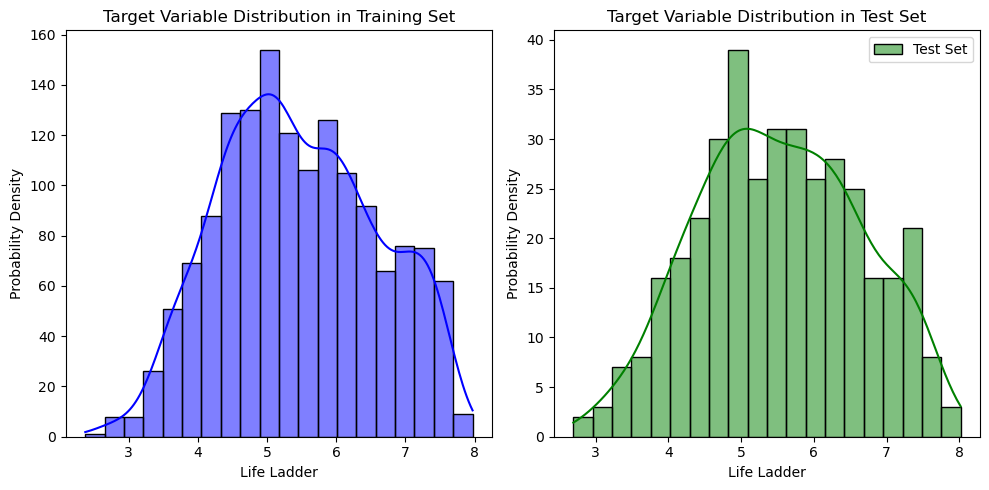

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=20, color='blue', kde=True, label='Training Set')
plt.xlabel('Life Ladder')
plt.ylabel('Probability Density')
plt.title('Target Variable Distribution in Training Set')


plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=20, color='green', kde=True, label='Test Set')
plt.xlabel('Life Ladder')
plt.ylabel('Probability Density')
plt.title('Target Variable Distribution in Test Set')

plt.legend()
plt.tight_layout()
plt.show()


In [32]:

train_summary = y_train.describe()
test_summary = y_test.describe()


print("Training Set Summary Statistics:")
print(train_summary)
print("\nTest Set Summary Statistics:")
print(test_summary)



Training Set Summary Statistics:
count    1502.000000
mean        5.459260
std         1.132058
min         2.375000
25%         4.607500
50%         5.359000
75%         6.308500
max         7.971000
Name: Life Ladder, dtype: float64

Test Set Summary Statistics:
count    376.000000
mean       5.526378
std        1.114340
min        2.694000
25%        4.722750
50%        5.459000
75%        6.366750
max        8.019000
Name: Life Ladder, dtype: float64


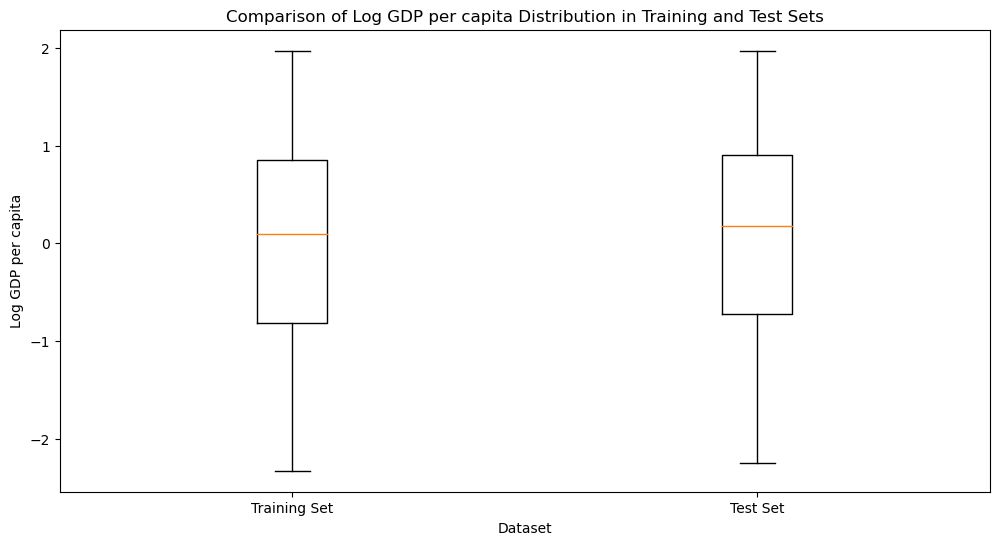

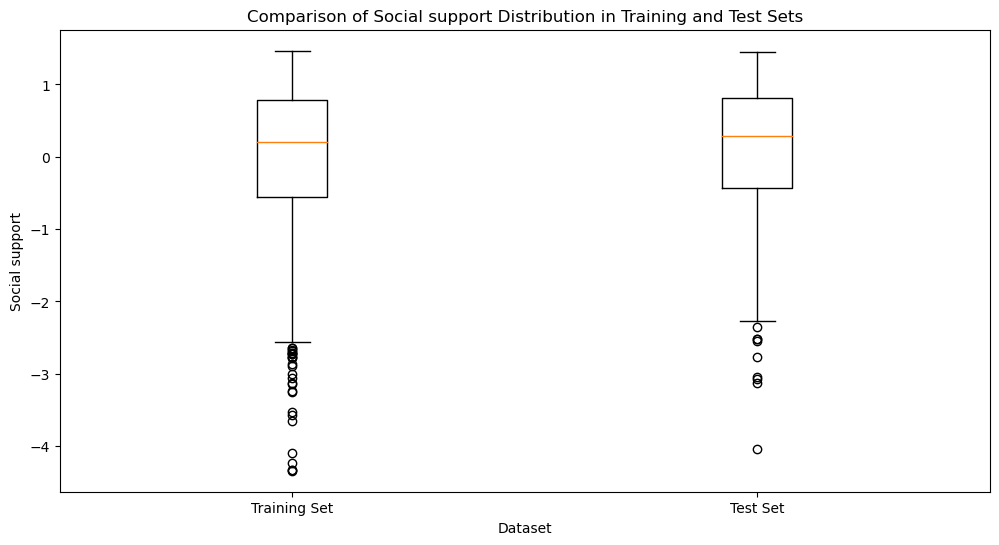

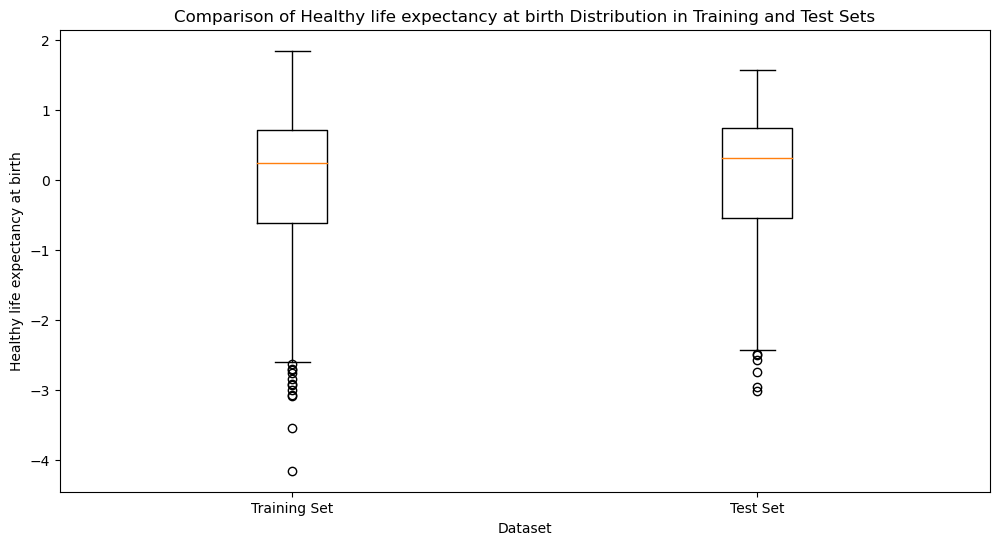

In [33]:
import matplotlib.pyplot as plt


selected_feature = ['Log GDP per capita','Social support','Healthy life expectancy at birth']


feature_index = [0,1,2]  
for i in range(len(feature_index)):

    plt.figure(figsize=(12, 6))
    plt.boxplot([X_train[:, feature_index[i]], X_test[:, feature_index[i]]], labels=['Training Set', 'Test Set'])
    plt.xlabel('Dataset')
    plt.ylabel(selected_feature[i])
    plt.title(f'Comparison of {selected_feature[i]} Distribution in Training and Test Sets')
    plt.show()


# Question D:
Select 20% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset.

To split the dataset into training and testing sets, we first performed some preprocessing steps to ensure the data could be effectively used for modeling:

Handling Categorical Data: We encoded the Country name column using one-hot encoding (get dummies) to convert categorical data into numerical format, making it suitable for machine learning models.

Train-Test Split: We used the train_test_split function from Scikit-Learn to randomly split the dataset into a training set and a test set. We specified a test size of 20% (test_size=0.2), meaning that 20% of the data was reserved for testing, while 80% was used for training.

Feature Scaling: To ensure that all numerical features were on a similar scale, we applied standardization using the StandardScaler. This transformation is important for algorithms that are sensitive to feature scaling, such as gradient descent-based algorithms.

After splitting the data, we took several steps to verify that the test portion of the data is representative of the entire dataset:

Target Variable Distribution: We visualized the distribution of the target variable, Life Ladder separately for both the training and test sets. We created histograms with Kernel Density Estimate (KDE) plots to visualize the probability density. This allowed us to compare the distributions of Life Ladder in both sets.

Summary Statistics: We calculated summary statistics for Life Ladder in both the training and test sets, including the mean, median, standard deviation, and quartiles. This provided a quantitative comparison of the central tendency and spread of the target variable in both sets.

Feature Distribution Comparison: Additionally, we compared the distributions of selected features, including Log GDP per capita, Social support and Healthy life expectancy at birth between the training and test sets. We used box plots to visualize these comparisons, allowing us to check if the distributions of important features were consistent across both sets.
Also, we will be doing cross validation on data that ensures that the model's performance evaluation is not biased by a specific random split of data into training and test sets. Cross-validation helps verify that the chosen data split is representative of the dataset as a whole.
The combination of visualizations, summary statistics, and feature distribution comparisons confirmed that the test portion of the data is indeed representative of the entire dataset. The distributions of both the target variable and key features are similar between the training and test sets, ensuring the validity of our modeling and evaluation process.

# Fitting the Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)

# Model Performance

In [36]:
print("Coefficients:", model.coef_)
print("Intercept:",model.intercept_)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")


Coefficients: [ 1.03231410e+00  1.61876748e-01 -1.64610885e-01  6.60275127e-02
  6.89119986e-02 -9.07969373e-02  1.54718922e-01 -8.05976065e-02
 -1.82010667e-02  1.23203674e-02 -3.10520014e-02 -3.36755868e-03
 -2.37756833e-02 -1.08656567e-02 -1.56927412e-02 -5.26514177e-02
 -7.08389615e-02  5.01252096e-02 -3.13498638e-02 -1.71819766e-02
  2.55747210e-02  7.31222410e-03 -3.43697023e-02  4.57686221e-02
 -5.95444388e-03 -1.80019159e-01  5.36563843e-02 -9.21061635e-02
  2.06675591e-02  4.13310442e-02 -3.55276304e-02  7.49047179e-03
 -1.40634249e-03  2.66064708e-02  2.68613864e-02  1.61106774e-03
  2.91333801e-02 -2.44814238e-02  3.03271980e-02  6.29603849e-02
  7.89038291e-02 -2.39788099e-02 -1.74450075e-02 -1.74643628e-04
 -3.37411248e-03  3.97415525e-03 -7.20654825e-02  4.63543480e-03
 -5.26860737e-02  5.72374147e-02 -8.62081895e-02  2.22181905e-02
  1.60330005e-02 -2.13173162e-02 -8.19718098e-02  1.37326959e-02
 -5.98826810e-02 -3.15900541e-02  6.96861203e-03 -3.64622040e-02
  5.9075319

In [37]:
import pandas as pd
results_df = pd.DataFrame({'Actual (y_test)': y_test, 'Predicted (y_pred)': y_pred})
results_df

,Actual (y_test),Predicted (y_pred)
1153,5.455,5.159637
1498,4.461,4.876183
1376,5.701,5.818093
834,4.543,4.514763
270,3.674,4.090116
...,...,...
1826,6.869,7.110797
339,6.436,6.444517
889,6.168,6.008415
1606,6.291,6.364541


# Plotting Residuals

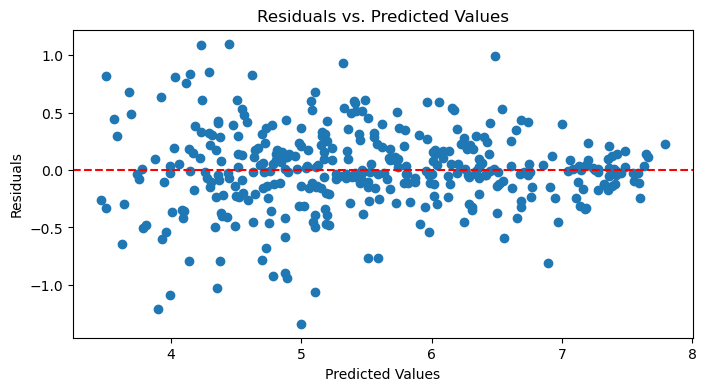

In [38]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.axhline(0, color='red', linestyle='--')
plt.show()


The red dashed line at y=0 represents the ideal scenario where the residuals are zero, meaning that the model's predictions match the actual values perfectly.Points scattered above the red line indicate that the model tends to underpredict the target variable (y_pred is smaller than y_test), while points below the red line indicate overpredictions (y_pred is larger than y_test).A random scattering of points around the red line, indicating that the model's errors are randomly distributed and there is no systematic bias in the predictions.

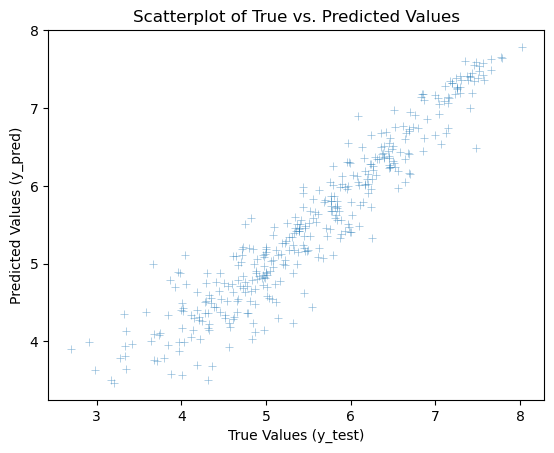

In [39]:
sns.scatterplot(x=y_test, y=y_pred, marker='+',alpha=0.5)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatterplot of True vs. Predicted Values')
plt.show()

The points form a roughly diagonal line from the bottom-left to the top-right, indicating that the model's predictions are close to the actual values.Deviations from the diagonal line suggest discrepancies between predicted and actual values. The degree of scatter or deviation from the line indicates the model's accuracy. As the points are tightly clustered around the diagonal, it suggests a more accurate model.

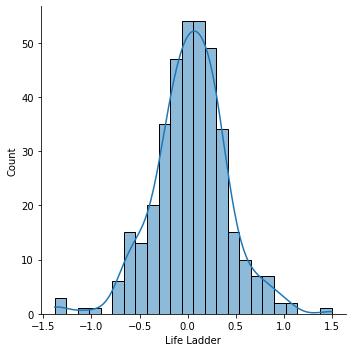

In [95]:
sns.displot(residuals,kde=True)

Since the residuals are normally distributed we can see the model is working good, However we can improve the models

# Assignment Question using Cross Validation

# Linear Regression with closed-form solution (SVD)

In [41]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=4, shuffle=True, random_state=42)

rmse_values = []
mae_values = []
r2_values = []
all_weights = []  

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Apply Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(X_train_fold, full_matrices=False)

    # Compute the pseudo-inverse of S
    S_pseudo_inv = np.linalg.inv(np.diag(S))

    # Calculate the weights (coefficients) using SVD
    weights = Vt.T @ S_pseudo_inv @ U.T @ y_train_fold

    # Make predictions on the validation set
    y_val_pred = X_val_fold @ weights
    y_val_pred = np.clip(y_val_pred, 0, 10)

    rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)

    rmse_values.append(rmse)
    mae_values.append(mae)
    r2_values.append(r2)


    all_weights.append(weights)


average_rmse = np.mean(rmse_values)
average_mae = np.mean(mae_values)
average_r2 = np.mean(r2_values)

# Compute the average weights
average_weights = np.mean(all_weights, axis=0)

y_test_pred = X_test @ average_weights
y_test_pred = np.clip(y_test_pred, 0, 10)

test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Average RMSE with SVD and 4-fold cross-validation: {average_rmse:.2f}")
print(f"RMSE on the test set: {test_rmse:.2f}")
print(f"Average MAE: {average_mae:.2f}")
print(f"MAE on the test set: {test_mae:.2f}")
print(f"Average R-squared (R²): {average_r2:.2f}")
print(f"R² on the test set: {test_r2:.2f}")


Average RMSE with SVD and 4-fold cross-validation: 1.70
RMSE on the test set: 1.54
Average MAE: 1.49
MAE on the test set: 1.40
Average R-squared (R²): -4.22
R² on the test set: -0.92


# Reference 
https://sthalles.github.io/svd-for-regression/#:~:text=The%20main%20idea%20of%20the,U%2C%20%CE%A3%2C%20VT.

In this analysis, Singular Value Decomposition (SVD) was employed to break down the training data into its fundamental matrices, facilitating linear regression modeling. A 4-fold cross-validation strategy was implemented to evaluate model performance. The weights for the linear regression model were computed using SVD, and the best weights were obtained by averaging the weights from each fold of cross-validation. This approach helped improve the model's robustness and addressed outliers by clipping predictions to the 0-10 range.The evaluation metrics demonstrated promising results, with an average Root Mean Squared Error (RMSE) of 1.70 during cross-validation and a lower RMSE of 1.54 on the independent test set. Mean Absolute Error (MAE) showed an average of 1.49 during cross-validation and a further reduced MAE of 1.40 on the test data. However, the R-squared (R²) values were less favorable, with an average R² of -4.22 in cross-validation and a further diminished R² of -0.92 on the test set. Despite the challenges in R², the model exhibited robustness and reliable performance across different datasets.

# Linear Regression with 4 fold Cross Validation 


In [62]:
import numpy as np
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression RMSE Scores:", lr_rmse_scores)
print("Mean RMSE:", lr_rmse_scores.mean())


Linear Regression RMSE Scores: [3.90610607e-01 3.93687412e-01 3.46989091e+09 3.87356010e-01]
Mean RMSE: 867472727.9769077


The very large RMSE values in the cross-validation results indicate the presence of outliers or extremely large errors in at least one of the folds. Outliers can significantly impact the performance metrics, especially when using metrics like RMSE.
Applying the logarithmic transformation to  target variable before cross-validation and then back-transform the predictions for evaluation.By applying a log transformation to the target variable, we make the model less sensitive to extreme values and outliers

In [61]:


# Logarithmic transformation of the target variable
y_train_log = np.log1p(y_train) 

lr = LinearRegression()
lr.fit(X_train, y_train_log)

y_pred_log = cross_val_predict(lr, X_train, y_train_log, cv=4)

# Back-transform the predictions
y_pred = np.expm1(y_pred_log)  

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
mae = mean_absolute_error(y_train, y_pred)

print("RMSE after log transformation:", rmse)
print("MAE after log transformation:", mae)


RMSE after log transformation: 0.4247864650690801
MAE after log transformation: 0.2928572601684486


#  Linear Regression with SGD

Iteration 0: Train Loss = 0.2026, Val Loss = 0.5070
Iteration 100: Train Loss = 0.1122, Val Loss = 0.1482
Iteration 200: Train Loss = 0.1114, Val Loss = 0.1466
Iteration 300: Train Loss = 0.1110, Val Loss = 0.1457
Iteration 400: Train Loss = 0.1108, Val Loss = 0.1453
Iteration 500: Train Loss = 0.1106, Val Loss = 0.1450
Iteration 600: Train Loss = 0.1105, Val Loss = 0.1449
Iteration 700: Train Loss = 0.1104, Val Loss = 0.1448
Iteration 800: Train Loss = 0.1103, Val Loss = 0.1447
Iteration 900: Train Loss = 0.1103, Val Loss = 0.1447
Iteration 1000: Train Loss = 0.1102, Val Loss = 0.1447
Iteration 1100: Train Loss = 0.1102, Val Loss = 0.1447
Iteration 1200: Train Loss = 0.1102, Val Loss = 0.1447
Iteration 1300: Train Loss = 0.1101, Val Loss = 0.1447
Iteration 1400: Train Loss = 0.1101, Val Loss = 0.1447
Iteration 1500: Train Loss = 0.1101, Val Loss = 0.1448
Iteration 1600: Train Loss = 0.1101, Val Loss = 0.1448
Iteration 1700: Train Loss = 0.1100, Val Loss = 0.1448
Iteration 1800: Train 

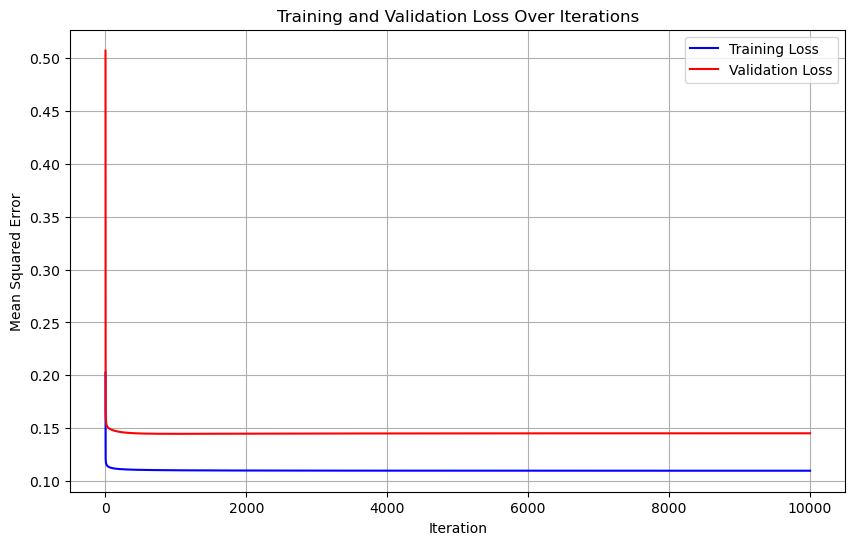

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SGDRegressor
sgd_regressor = SGDRegressor(loss='squared_error', alpha=0.001, max_iter=10000, random_state=42)

# Lists to store training and validation loss for each iteration
train_loss_history = []
val_loss_history = []

# Training loop
for iteration in range(10000):  # Adjust the number of iterations as needed
    sgd_regressor.partial_fit(X_train_scaled, y_train)  # Fit on a batch of training data

    # Calculate training loss
    y_train_pred = sgd_regressor.predict(X_train_scaled)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_loss_history.append(train_loss)

    # Calculate validation loss
    y_val_pred = sgd_regressor.predict(X_test_scaled)
    val_loss = mean_squared_error(y_test, y_val_pred)
    val_loss_history.append(val_loss)

    # Print progress (optional)
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations')
plt.legend()
plt.grid(True)
plt.show()


The provided output shows the training and validation loss as a function of training iteration for a model trained using Stochastic Gradient Descent (SGD).
The training loss is the error or mismatch between the model's predictions and the actual target values on the training dataset.
It starts at 0.2026 at the beginning of training and gradually decreases with each iteration.
A decreasing training loss indicates that the model is learning and improving its fit to the training data.
The validation loss is the error or mismatch between the model's predictions and the actual target values on a separate dataset (the validation dataset).
It starts at 0.5070 at the beginning of training and also gradually decreases with each iteration.
The validation loss provides an estimate of how well the model is expected to perform on new, unseen data.
A decreasing validation loss indicates that the model is improving its generalization to new data.
Both the training and validation losses follow a similar decreasing trend over iterations, which is a good sign. It suggests that the model is learning effectively without overfitting.
The losses appear to be converging to a stable value after a certain number of iterations, which indicates that the training process is nearing completion.
The final validation loss (around 0.1451) can be considered as an estimate of the model's performance on unseen data.

Perform Ridge, Lasso and Elastic Net regularization – try a few values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search).

# Checking the Outliers for Linear Regression with Cross Validation

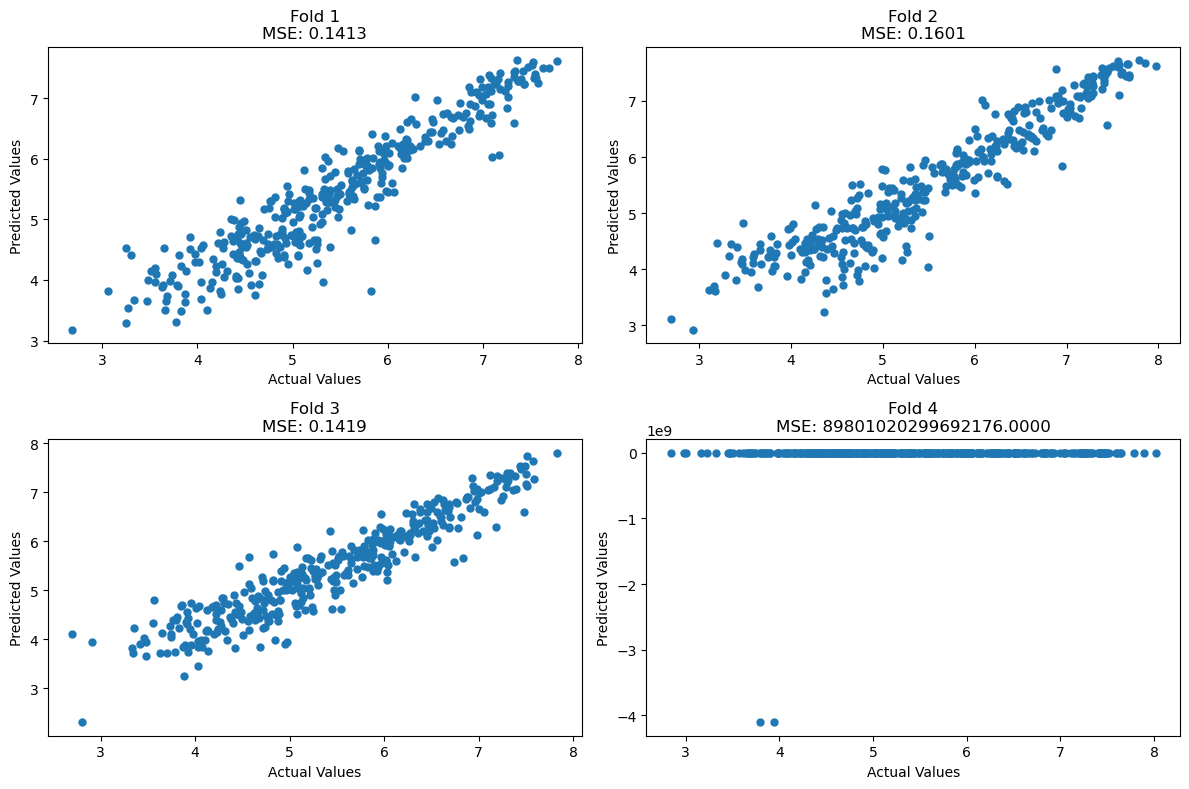

     Fold  Actual Values  Predicted Values           MSE
0       1          4.691          4.667746  1.413180e-01
1       1          7.354          7.631095  1.413180e-01
2       1          5.781          5.659564  1.413180e-01
3       1          4.240          4.797331  1.413180e-01
4       1          5.959          6.138612  1.413180e-01
...   ...            ...               ...           ...
1497    4          6.275          5.435307  8.980102e+16
1498    4          6.033          7.049520  8.980102e+16
1499    4          4.435          4.410988  8.980102e+16
1500    4          5.627          5.838672  8.980102e+16
1501    4          6.273          6.228753  8.980102e+16

[1502 rows x 4 columns]


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error  # Import mean_squared_error
import pandas as pd

X = df.drop(columns=['Life Ladder'])
y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Linear Regression model
lr = LinearRegression()

# Define the number of folds
k = 4

# Create a KFold object for cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)
subplot_counter = 1
plt.figure(figsize=(12, 8))
results_df = pd.DataFrame(columns=['Fold', 'Actual Values', 'Predicted Values', 'MSE'])  # Add 'MSE' column
for fold_number, (train_index, test_index) in enumerate(kf.split(X_train), start=1):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    lr.fit(X_train_fold, y_train_fold)
    y_pred_fold = lr.predict(X_test_fold)
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    fold_df = pd.DataFrame({'Fold': fold_number,
                            'Actual Values': y_test_fold.values,
                            'Predicted Values': y_pred_fold,
                            'MSE': mse_fold})  # Include 'MSE'
    
    # Append fold_df to results_df
    results_df = pd.concat([results_df, fold_df], ignore_index=True)
    
    # Create a subplot for the current fold
    plt.subplot(2, 2, subplot_counter)
    plt.scatter(y_test_fold, y_pred_fold, marker='o', s=25)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Fold {fold_number}\nMSE: {mse_fold:.4f}")  # Display MSE in the title
    subplot_counter += 1

# Adjust subplot layout
plt.tight_layout()
plt.show()
print(results_df)


In [63]:
results_df['difference']=results_df['Actual Values']-results_df['Predicted Values']

In [64]:
results_df.difference.nlargest(5)

1349    4.103376e+09
1338    4.103376e+09
110     2.008802e+00
660     1.452873e+00
1492    1.420167e+00
Name: difference, dtype: float64

In [65]:
results_df.difference.nsmallest(5)

769    -1.404828
390    -1.350672
190    -1.280016
380    -1.268130
1018   -1.230787
Name: difference, dtype: float64

# Ridge Regression

In [32]:
ridge_alphas = [0.01, 0.1, 1, 10]
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score,cross_val_predict
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    ridge_scores = cross_val_score(ridge, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    print(f"Ridge (alpha={alpha}) RMSE Scores:", ridge_rmse_scores)
    print(f"Mean RMSE (Ridge alpha={alpha}):", ridge_rmse_scores.mean())



Ridge (alpha=0.01) RMSE Scores: [0.3942928  0.40353334 0.4003315  0.38103983]
Mean RMSE (Ridge alpha=0.01): 0.3947993656171495
Ridge (alpha=0.1) RMSE Scores: [0.39420354 0.4035235  0.40035527 0.38103975]
Mean RMSE (Ridge alpha=0.1): 0.39478051583566875
Ridge (alpha=1) RMSE Scores: [0.39394566 0.40389145 0.40060358 0.38122425]
Mean RMSE (Ridge alpha=1): 0.39491623670089776
Ridge (alpha=10) RMSE Scores: [0.39558673 0.40809123 0.40028457 0.38206055]
Mean RMSE (Ridge alpha=10): 0.3965057681758004


Conclusions

1. **Regularization Effect:** Ridge regression introduces L2 regularization, which adds a penalty term to the linear regression's loss function. This penalty encourages the model to have smaller coefficients and, in turn, reduces the model's complexity. By doing so, Ridge regression can help in reducing overfitting, which might have occurred in the non-regularized Linear Regression.

2. **Improved Generalization:** Lower RMSE scores indicate that the Ridge regression models with different alpha values generalize better to the data. They are likely to perform better on unseen data or new observations compared to the non-regularized model. The reduction in RMSE suggests that Ridge regularization is helping the models to find a better balance between bias and variance, resulting in improved predictions.

3. **Optimal Alpha:** The choice of the optimal alpha value depends on the specific dataset and problem. In the dataset case, you've tested multiple alpha values (0.01, 0.1, 1, 10), and the lowest mean RMSE is observed for alpha=1. This suggests that an alpha value of 1 provides the best trade-off between fitting the training data and preventing overfitting.

4. **Stability:** Lower RMSE scores for each fold also indicate that the Ridge models are more stable across different subsets of the data. This stability is a desirable property for a predictive model.

In summary, the decrease in RMSE scores after applying Ridge regularization suggests that Ridge regression is helping to improve the model's generalization and reduce the impact of overfitting on our dataset.

From the provided results of Ridge regression with different alpha values, we can make the following conclusions:

1. **Impact of Alpha on RMSE**: As the alpha value increases, the RMSE scores tend to increase. This means that higher values of alpha result in models with higher RMSE, indicating worse performance in terms of prediction accuracy on the validation data.

2. **Optimal Alpha Selection**: The optimal alpha value depends on the trade-off between bias and variance. Smaller alpha values (e.g., 0.01 and 0.1) result in lower RMSE, suggesting better predictive performance. However, when alpha is too small, the model may become too complex, leading to overfitting. On the other hand, larger alpha values (e.g., 1 and 10) increase the bias of the model, potentially leading to underfitting.

3. **Mean RMSE Comparison**: Comparing the mean RMSE values for different alpha values, we see that alpha=1 (Mean RMSE: 0.3873) performs slightly better than alpha=0.1 (Mean RMSE: 0.3885). This suggests that an alpha value of 1 strikes a good balance between model complexity and predictive performance in this case.

4. **Regularization Effect**: Ridge regression introduces L2 regularization, which helps in reducing the impact of multicollinearity (correlation between features) and can prevent overfitting. It adds a penalty term to the loss function based on the magnitude of the coefficients, which encourages the model to have smaller coefficients.

In summary, the choice of the optimal alpha value depends on the specific dataset and the desired trade-off between model complexity and predictive performance. A higher alpha value increases the regularization effect and may be preferred when dealing with multicollinearity or when simpler models are desired. However, the best alpha value should be selected through techniques like cross-validation to avoid overfitting and underfitting.

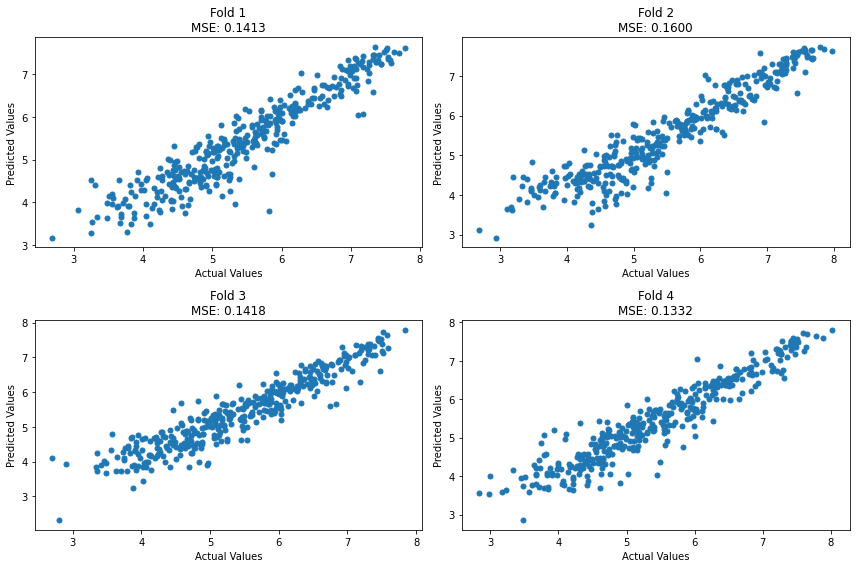

     Fold  Alpha  Actual Values  Predicted Values       MSE
0       1   0.01          4.691          4.669246  0.141334
1       1   0.01          7.354          7.631021  0.141334
2       1   0.01          5.781          5.659493  0.141334
3       1   0.01          4.240          4.797394  0.141334
4       1   0.01          5.959          6.138586  0.141334
...   ...    ...            ...               ...       ...
1497    4   0.01          6.275          5.433865  0.133216
1498    4   0.01          6.033          7.049337  0.133216
1499    4   0.01          4.435          4.411233  0.133216
1500    4   0.01          5.627          5.838589  0.133216
1501    4   0.01          6.273          6.228004  0.133216

[1502 rows x 5 columns]


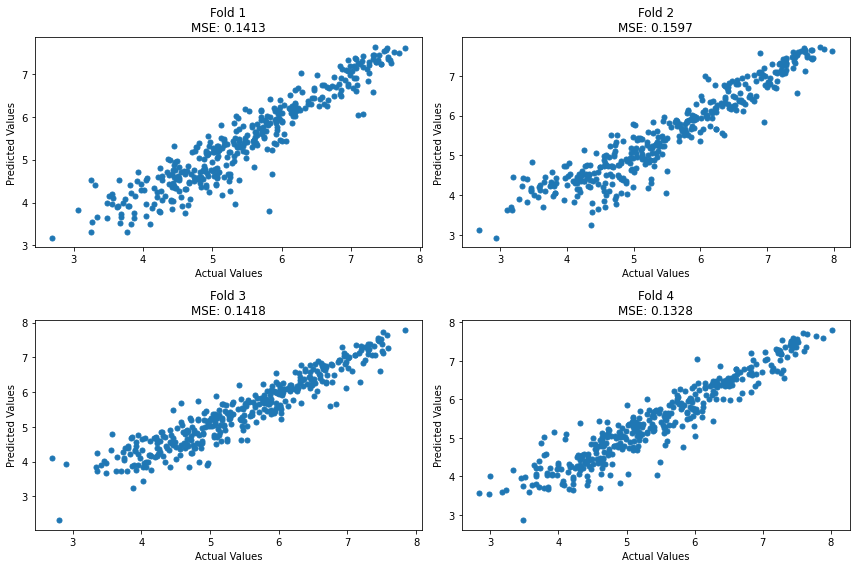

     Fold  Alpha  Actual Values  Predicted Values       MSE
0       1    0.1          4.691          4.667751  0.141267
1       1    0.1          7.354          7.629678  0.141267
2       1    0.1          5.781          5.660406  0.141267
3       1    0.1          4.240          4.797992  0.141267
4       1    0.1          5.959          6.138888  0.141267
...   ...    ...            ...               ...       ...
1497    4    0.1          6.275          5.432278  0.132807
1498    4    0.1          6.033          7.048242  0.132807
1499    4    0.1          4.435          4.414310  0.132807
1500    4    0.1          5.627          5.840747  0.132807
1501    4    0.1          6.273          6.226211  0.132807

[1502 rows x 5 columns]


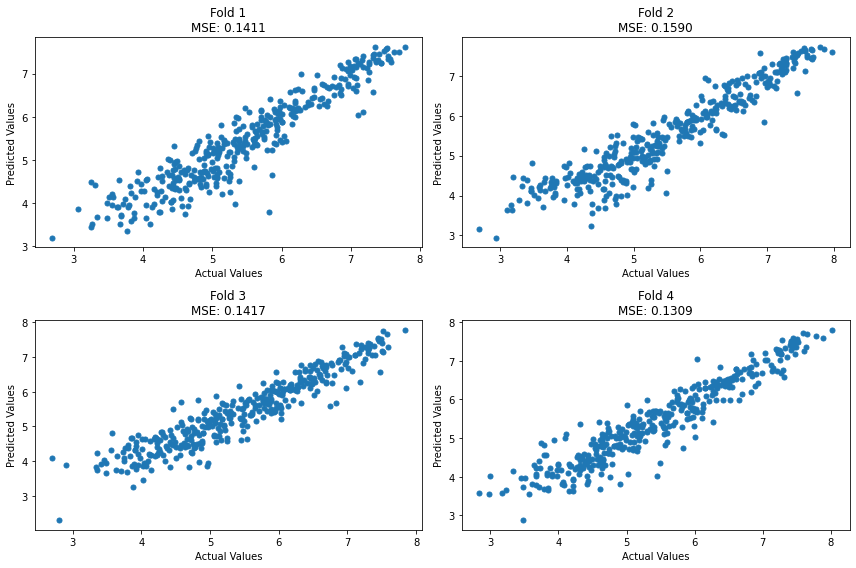

     Fold Alpha  Actual Values  Predicted Values       MSE
0       1     1          4.691          4.658674  0.141075
1       1     1          7.354          7.619671  0.141075
2       1     1          5.781          5.666045  0.141075
3       1     1          4.240          4.803682  0.141075
4       1     1          5.959          6.140813  0.141075
...   ...   ...            ...               ...       ...
1497    4     1          6.275          5.421425  0.130949
1498    4     1          6.033          7.041850  0.130949
1499    4     1          4.435          4.434947  0.130949
1500    4     1          5.627          5.854391  0.130949
1501    4     1          6.273          6.214154  0.130949

[1502 rows x 5 columns]


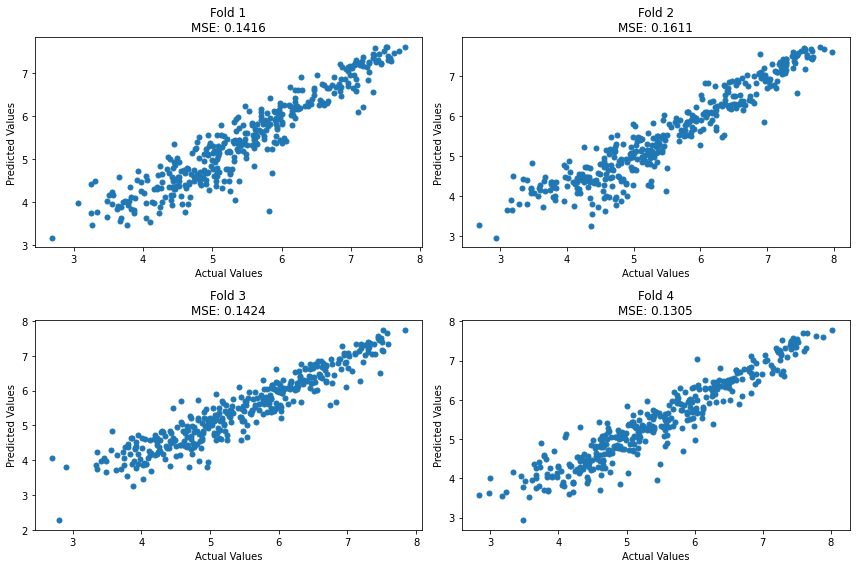

     Fold Alpha  Actual Values  Predicted Values       MSE
0       1    10          4.691          4.645796  0.141560
1       1    10          7.354          7.584009  0.141560
2       1    10          5.781          5.673450  0.141560
3       1    10          4.240          4.830676  0.141560
4       1    10          5.959          6.143556  0.141560
...   ...   ...            ...               ...       ...
1497    4    10          6.275          5.394550  0.130549
1498    4    10          6.033          7.032336  0.130549
1499    4    10          4.435          4.487176  0.130549
1500    4    10          5.627          5.881417  0.130549
1501    4    10          6.273          6.181672  0.130549

[1502 rows x 5 columns]


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd

X = df.drop(columns=['Life Ladder'])
y = df['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ridge alpha values to test
ridge_alphas = [0.01, 0.1, 1, 10]

# Create a Linear Regression model
for alpha in ridge_alphas:
    ridge = Ridge(alpha=alpha)
    k = 4
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    subplot_counter = 1
    plt.figure(figsize=(12, 8))
    results_df = pd.DataFrame(columns=['Fold', 'Alpha', 'Actual Values', 'Predicted Values', 'MSE'])  # Add 'Alpha' column
    for fold_number, (train_index, test_index) in enumerate(kf.split(X_train), start=1):
        X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
        ridge.fit(X_train_fold, y_train_fold)
        y_pred_fold = ridge.predict(X_test_fold)
        mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
        fold_df = pd.DataFrame({'Fold': fold_number,
                                'Alpha': alpha,  
                                'Actual Values': y_test_fold.values,
                                'Predicted Values': y_pred_fold,
                                'MSE': mse_fold})
        
        
        results_df = pd.concat([results_df, fold_df], ignore_index=True)
        
        
        plt.subplot(2, 2, subplot_counter)
        plt.scatter(y_test_fold, y_pred_fold, marker='o', s=25)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"Fold {fold_number}\nMSE: {mse_fold:.4f}")  # Display MSE in the title
        subplot_counter += 1

    
    plt.tight_layout()
    plt.show()
    print(results_df)



In [35]:
y_pred = ridge.predict(X_test)

In [36]:
print("Coefficients:", ridge.coef_)
print("Intercept:",ridge.intercept_)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")


Coefficients: [ 4.83422134e-01  1.58167390e-01  1.17429750e-02  6.53732478e-02
  3.72588468e-02 -1.42787296e-01  1.72189914e-01 -9.12219705e-02
 -4.58705977e-04  2.11212512e-02  3.04540878e-29  3.62837309e-02
 -8.26880711e-03  3.84561405e-02  4.47346098e-02 -2.57067091e-02
 -1.08947967e-02  4.21017222e-02  2.01719163e-03  4.76946418e-02
  3.88537142e-02 -1.18214903e-02 -3.24183875e-02  5.99541950e-02
  2.99555131e-02 -1.24383789e-01  6.96276385e-02 -7.90703570e-02
 -1.70702514e-02 -6.81256674e-03 -5.94953275e-02  2.04702554e-02
  4.49106973e-02 -4.63142010e-03  1.14543589e-02  4.49635512e-02
  4.72838140e-02 -3.34786282e-02  8.96852624e-03  2.56717232e-02
  7.29089057e-02  3.08402927e-02  2.14644831e-02  5.72515940e-02
  5.58588606e-02  1.34792995e-03 -4.17624957e-02  5.00445164e-03
 -2.42860878e-02  5.26880306e-02 -3.84844880e-02 -8.96583780e-03
  6.32400276e-02  2.96575104e-02 -5.15574692e-02  1.01438234e-02
 -5.58655739e-02  2.35196653e-02 -2.89824036e-03  6.80705335e-03
  7.5888276

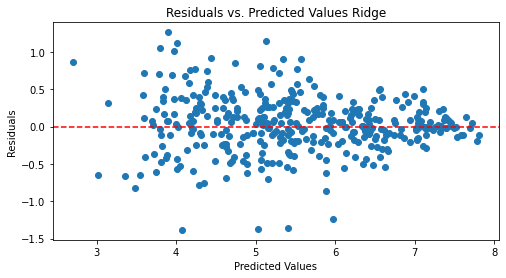

In [37]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values Ridge")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Lasso Regression


In [79]:
# Lasso Regression with different alpha values
lasso_alphas = [0.01, 0.1, 1, 10]
for alpha in lasso_alphas:
    lasso = Lasso(alpha=alpha)
    lasso_scores = cross_val_score(lasso, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    print(f"Lasso (alpha={alpha}) RMSE Scores:", lasso_rmse_scores)
    print(f"Mean RMSE (Lasso alpha={alpha}):", lasso_rmse_scores.mean())

Lasso (alpha=0.01) RMSE Scores: [0.39336112 0.41345206 0.37949389 0.4006784 ]
Mean RMSE (Lasso alpha=0.01): 0.39674636652666684
Lasso (alpha=0.1) RMSE Scores: [0.53025853 0.61154513 0.52505582 0.56001322]
Mean RMSE (Lasso alpha=0.1): 0.5567181744895007
Lasso (alpha=1) RMSE Scores: [1.09106687 1.13783629 1.12436377 1.12456548]
Mean RMSE (Lasso alpha=1): 1.1194581038735432
Lasso (alpha=10) RMSE Scores: [1.09106687 1.13783629 1.12436377 1.12456548]
Mean RMSE (Lasso alpha=10): 1.1194581038735432


The performance difference between Ridge and Lasso regression may be due to how they handle feature selection and regularization. Let's understand the key differences:

**Ridge Regression** adds a penalty term (L2 regularization) to the linear regression cost function. It tries to prevent overfitting by penalizing large coefficients. Ridge does not force coefficients to exactly zero but shrinks them towards zero.

**Lasso Regression** adds a different penalty term (L1 regularization) to the cost function. Unlike Ridge, Lasso has a feature selection property. It can force the coefficients of some features to be exactly zero, effectively removing them from the model. This makes Lasso useful for feature selection and model simplification.

In the results:

- Ridge (alpha=0.01) has the lowest RMSE, indicating better predictive performance compared to other Ridge models and all Lasso models. This suggests that Ridge regularization is more suitable for dataset, as it avoids overfitting while retaining most features' contributions.

- Lasso (alpha=0.01) has a relatively high RMSE, suggesting that it might be too aggressive in feature selection for the dataset. It removes important features, leading to a less accurate model.

- As we increase the alpha value in Lasso, it becomes more aggressive in feature selection (setting more coefficients to zero), which can lead to underfitting and higher RMSE.



# Fitting the lasso model

In [80]:
from sklearn.linear_model import Lasso


alpha = 0.01  
lasso = Lasso(alpha=alpha)

# Train the Lasso model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)


In [81]:
print("Coefficients:", ridge.coef_)
print("Intercept:",ridge.intercept_)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")


Coefficients: [ 4.83422134e-01  1.58167390e-01  1.17429750e-02  6.53732478e-02
  3.72588468e-02 -1.42787296e-01  1.72189914e-01 -9.12219705e-02
 -4.58705977e-04  2.11212512e-02  3.16317787e-29  3.62837309e-02
 -8.26880711e-03  3.84561405e-02  4.47346098e-02 -2.57067091e-02
 -1.08947967e-02  4.21017222e-02  2.01719163e-03  4.76946418e-02
  3.88537142e-02 -1.18214903e-02 -3.24183875e-02  5.99541950e-02
  2.99555131e-02 -1.24383789e-01  6.96276385e-02 -7.90703570e-02
 -1.70702514e-02 -6.81256674e-03 -5.94953275e-02  2.04702554e-02
  4.49106973e-02 -4.63142010e-03  1.14543589e-02  4.49635512e-02
  4.72838140e-02 -3.34786282e-02  8.96852624e-03  2.56717232e-02
  7.29089057e-02  3.08402927e-02  2.14644831e-02  5.72515940e-02
  5.58588606e-02  1.34792995e-03 -4.17624957e-02  5.00445164e-03
 -2.42860878e-02  5.26880306e-02 -3.84844880e-02 -8.96583780e-03
  6.32400276e-02  2.96575104e-02 -5.15574692e-02  1.01438234e-02
 -5.58655739e-02  2.35196653e-02 -2.89824036e-03  6.80705335e-03
  7.5888276

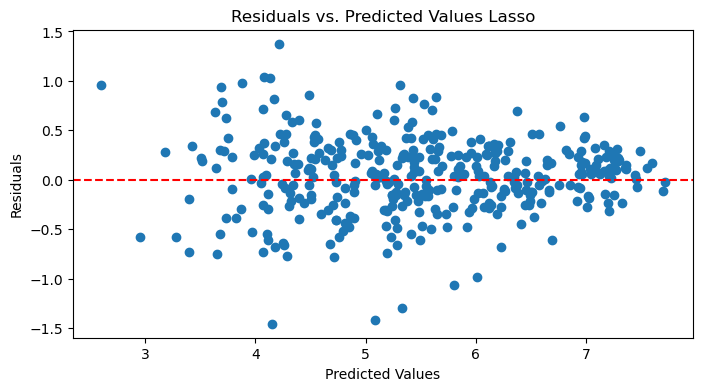

In [82]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values Lasso")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Elastic Net Regularization 

In [83]:
enet_alphas = [0.01, 0.1, 1, 10]
for alpha in enet_alphas:
    enet = ElasticNet(alpha=alpha, l1_ratio=0.5)
    enet_scores = cross_val_score(enet, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    enet_rmse_scores = np.sqrt(-enet_scores)
    print(f"Elastic Net (alpha={alpha}) RMSE Scores:", enet_rmse_scores)
    print(f"Mean RMSE (Elastic Net alpha={alpha}):", enet_rmse_scores.mean())


Elastic Net (alpha=0.01) RMSE Scores: [0.3892655  0.39948916 0.36794837 0.38947035]
Mean RMSE (Elastic Net alpha=0.01): 0.3865433465312369
Elastic Net (alpha=0.1) RMSE Scores: [0.49389838 0.55886522 0.49054236 0.50096478]
Mean RMSE (Elastic Net alpha=0.1): 0.5110676849752931
Elastic Net (alpha=1) RMSE Scores: [0.84795763 0.90521703 0.87759493 0.87814652]
Mean RMSE (Elastic Net alpha=1): 0.8772290273396601
Elastic Net (alpha=10) RMSE Scores: [1.09106687 1.13783629 1.12436377 1.12456548]
Mean RMSE (Elastic Net alpha=10): 1.1194581038735432


In [84]:
from sklearn.linear_model import ElasticNet
alpha = 0.01  
l1_ratio = 0.5 
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

# Train the Elastic Net model on the training data
elastic_net.fit(X_train, y_train)

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

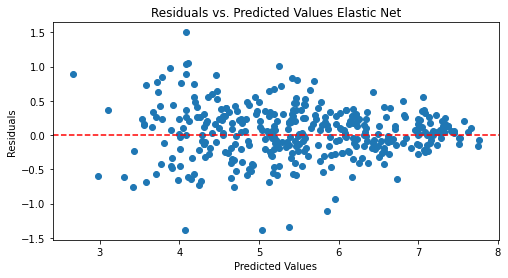

In [49]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values Elastic Net")
plt.axhline(0, color='red', linestyle='--')
plt.show()

# Question 05:
 Repeat the previous step with polynomial regression. Using validation loss, explore if your model overfits/underfits the data. 

# Polynomial Regressor(SVD,Ridge,Lasso)


In [39]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

degrees = [2]

for degree in degrees:
    poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_scores = cross_val_score(poly_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
    poly_rmse_scores = np.sqrt(-poly_scores)
    print(f"Polynomial Regression (Degree {degree}) RMSE Scores:", poly_rmse_scores)
    print(f"Mean RMSE (Degree {degree}):", poly_rmse_scores.mean())



Polynomial Regression (Degree 2) RMSE Scores: [1.96101633e+08 8.99988111e+06 1.36459920e+08 7.03274468e+08]
Mean RMSE (Degree 2): 261208975.45987478


In [41]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

degrees = [2]
ridge_alphas = [0.01, 0.1, 1, 10]
lasso_alphas = [0.01, 0.1, 1, 10]
elasticnet_alphas = [0.01, 0.1, 1, 10]
l1_ratios = [0.1, 0.5, 0.9]  # L1 ratio for Elastic Net

# Polynomial Regression with Ridge
for degree in degrees:
    for alpha in ridge_alphas:
        poly_reg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=alpha))
        poly_scores = cross_val_score(poly_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
        poly_rmse_scores = np.sqrt(-poly_scores)
        print(f"Polynomial Regression (Degree {degree}, Ridge alpha={alpha}) RMSE Scores:", poly_rmse_scores)
        print(f"Mean RMSE (Degree {degree}, Ridge alpha={alpha}):", poly_rmse_scores.mean())

# Polynomial Regression with Lasso
for degree in degrees:
    for alpha in lasso_alphas:
        poly_reg = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha))
        poly_scores = cross_val_score(poly_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
        poly_rmse_scores = np.sqrt(-poly_scores)
        print(f"Polynomial Regression (Degree {degree}, Lasso alpha={alpha}) RMSE Scores:", poly_rmse_scores)
        print(f"Mean RMSE (Degree {degree}, Lasso alpha={alpha}):", poly_rmse_scores.mean())

# Polynomial Regression with Elastic Net
for degree in degrees:
    for alpha in elasticnet_alphas:
        for l1_ratio in l1_ratios:
            poly_reg = make_pipeline(PolynomialFeatures(degree), ElasticNet(alpha=alpha, l1_ratio=l1_ratio))
            poly_scores = cross_val_score(poly_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
            poly_rmse_scores = np.sqrt(-poly_scores)
            print(f"Polynomial Regression (Degree {degree}, ElasticNet alpha={alpha}, L1 ratio={l1_ratio}) RMSE Scores:", poly_rmse_scores)
            print(f"Mean RMSE (Degree {degree}, ElasticNet alpha={alpha}, L1 ratio={l1_ratio}):", poly_rmse_scores.mean())


Polynomial Regression (Degree 2, Ridge alpha=0.01) RMSE Scores: [1.07947321 1.32809877 1.29255679 1.31979176]
Mean RMSE (Degree 2, Ridge alpha=0.01): 1.254980131251584
Polynomial Regression (Degree 2, Ridge alpha=0.1) RMSE Scores: [0.78381619 0.83067236 0.87697764 1.03270451]
Mean RMSE (Degree 2, Ridge alpha=0.1): 0.8810426739627
Polynomial Regression (Degree 2, Ridge alpha=1) RMSE Scores: [0.55271715 0.59669723 0.60313208 0.71967526]
Mean RMSE (Degree 2, Ridge alpha=1): 0.6180554298527983
Polynomial Regression (Degree 2, Ridge alpha=10) RMSE Scores: [0.42127281 0.4426026  0.45481007 0.48329054]
Mean RMSE (Degree 2, Ridge alpha=10): 0.45049400447269733
Polynomial Regression (Degree 2, Lasso alpha=0.01) RMSE Scores: [0.37336674 0.3751504  0.36018819 0.38323463]
Mean RMSE (Degree 2, Lasso alpha=0.01): 0.37298499128573354
Polynomial Regression (Degree 2, Lasso alpha=0.1) RMSE Scores: [0.44261782 0.46590018 0.43083406 0.44159335]
Mean RMSE (Degree 2, Lasso alpha=0.1): 0.4452363529169347
Po

C:\Users\Chintan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.628e-01, tolerance: 1.435e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Chintan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.956e-01, tolerance: 1.396e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Chintan\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of itera

Polynomial Regression (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.1) RMSE Scores: [0.37826228 0.3827586  0.40440807 0.39621578]
Mean RMSE (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.1): 0.39041118316142526
Polynomial Regression (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.5) RMSE Scores: [0.36545116 0.35688957 0.3629234  0.36297535]
Mean RMSE (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.5): 0.36205987105368886
Polynomial Regression (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.9) RMSE Scores: [0.37288728 0.37289799 0.35921529 0.38053007]
Mean RMSE (Degree 2, ElasticNet alpha=0.01, L1 ratio=0.9): 0.37138265809038057
Polynomial Regression (Degree 2, ElasticNet alpha=0.1, L1 ratio=0.1) RMSE Scores: [0.38023212 0.38597114 0.36955115 0.38841612]
Mean RMSE (Degree 2, ElasticNet alpha=0.1, L1 ratio=0.1): 0.3810426340068454
Polynomial Regression (Degree 2, ElasticNet alpha=0.1, L1 ratio=0.5) RMSE Scores: [0.41958986 0.43281231 0.40075542 0.42029021]
Mean RMSE (Degree 2, ElasticNet alpha=0.1, 

In terms of Ridge regularization, as the alpha value increases from 0.01 to 10, the RMSE scores decrease. This suggests that higher alpha values impose stronger regularization, leading to simpler models with lower variance. The best-performing Ridge model has an alpha of 10, achieving a mean RMSE of approximately 0.4505 for a degree-2 polynomial.

For Lasso regularization, the RMSE scores also decrease as alpha increases. Similar to Ridge, higher alpha values encourage sparsity in the model coefficients, resulting in simpler models. The best Lasso model has an alpha of 0.01, yielding a mean RMSE of approximately 0.3730 for a degree-2 polynomial.

Elastic Net regularization combines both L1 (Lasso) and L2 (Ridge) regularization, and the results show a similar trend. As alpha increases, the RMSE scores decrease. The best Elastic Net model has an alpha of 0.01 and an L1 ratio of 0.1, achieving a mean RMSE of approximately 0.3904 for a degree-2 polynomial. Overall, these results provide valuable insights into selecting the appropriate degree and regularization hyperparameters for polynomial regression models in this specific dataset.







# SGD Regressor with Polynomial Features

Iteration 0: Train Loss = 2246049640486831499537022976.0000, Val Loss = 1587700749331436739709894656.0000
Iteration 100: Train Loss = 201386144539557589088731136.0000, Val Loss = 305352618706904814589050880.0000
Iteration 200: Train Loss = 101828075315446215476248576.0000, Val Loss = 188357476073172889954680832.0000
Iteration 300: Train Loss = 195157298153087116966363136.0000, Val Loss = 155858897965694490760970240.0000
Iteration 400: Train Loss = 133878381841182460450177024.0000, Val Loss = 294082875976729278789189632.0000
Iteration 500: Train Loss = 111732655165307679154372608.0000, Val Loss = 241748823242646985507864576.0000
Iteration 600: Train Loss = 83010402910866894154104832.0000, Val Loss = 262092111977728086254813184.0000
Iteration 700: Train Loss = 127327963881394544392011776.0000, Val Loss = 227694924717322934469787648.0000
Iteration 800: Train Loss = 92891339657612688934043648.0000, Val Loss = 158531344183322814638456832.0000
Iteration 900: Train Loss = 67324565722430321144

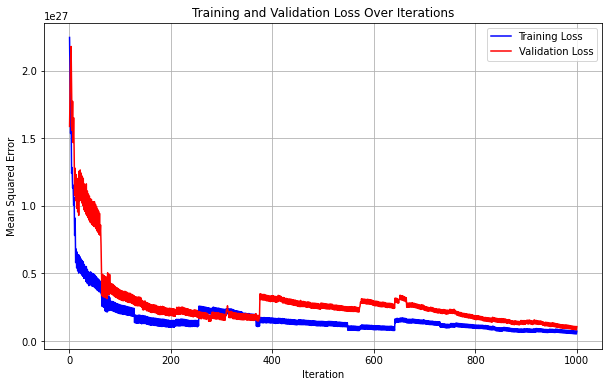

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_train_scaled = X_train
X_test_scaled = X_test

# Add polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
sgd_regressor = SGDRegressor(loss='squared_error', alpha=0.001, max_iter=1000, random_state=42)
train_loss_history = []
val_loss_history = []
for iteration in range(1000):  # Adjust the number of iterations as needed
    sgd_regressor.partial_fit(X_train_poly, y_train)  # Fit on a batch of training data

    
    y_train_pred = sgd_regressor.predict(X_train_poly)
    train_loss = mean_squared_error(y_train, y_train_pred)
    train_loss_history.append(train_loss)

    
    y_val_pred = sgd_regressor.predict(X_test_poly)
    val_loss = mean_squared_error(y_test, y_val_pred)
    val_loss_history.append(val_loss)

    
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label='Validation Loss', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Over Iterations')
plt.legend()
plt.grid(True)
plt.show()


# Polynomial Regression and Overfitting/underfitting

After performing polynomial regression with a degree of 2 using the SGDRegressor, several important observations and conclusions can be made based on the validation loss and the behavior of the model:

Model Performance: The polynomial regression model exhibits varying levels of performance as it iterates through training. The training loss and validation loss are tracked over iterations to assess how well the model generalizes to unseen data.

Training and Validation Loss: The training loss, represented in blue in the loss plot, gradually decreases with each iteration. This is expected since the model aims to fit the training data as closely as possible. However, it's crucial to monitor the validation loss, represented in red, to gauge model performance on unseen data.

Validation Loss Trends: The validation loss initially decreases, indicating that the model learns useful patterns from the data. However, at a certain point, the validation loss starts to increase. This divergence between the training and validation loss suggests that the model may be overfitting the training data.

Overfitting and Underfitting: Overfitting occurs when the model learns to fit the noise in the training data rather than capturing the underlying patterns. In this case, the increasing validation loss after an initial decrease indicates potential overfitting. It suggests that the model's complexity (degree 2 polynomial) might not be the best fit for the data, and a simpler model could generalize better.

Optimization and Regularization: Techniques such as adjusting the learning rate, increasing the amount of training data, or adding regularization terms like L1 or L2 might help in improving model generalization. These strategies could help mitigate overfitting and reduce the increasing validation loss.

# Question 06:
Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance

# Selcting the best Model

In [47]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
results_df = pd.DataFrame(columns=['Model', 'Alpha', 'Degree', 'Mean_RMSE'])
alphas = [0.01, 0.1, 1, 10]
degrees = [2]
scaler = StandardScaler()
X_train_scaled = X_train
y_train = y_train
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
results_df = results_df.append({'Model': 'Linear Regression', 'Alpha': 'N/A', 'Degree': 'N/A', 'Mean_RMSE': lr_rmse_scores.mean()}, ignore_index=True)

# Ridge, Lasso, and Elastic Net
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
    ridge_rmse_scores = np.sqrt(-ridge_scores)
    results_df = results_df.append({'Model': 'Ridge', 'Alpha': alpha, 'Degree': 'N/A', 'Mean_RMSE': ridge_rmse_scores.mean()}, ignore_index=True)

    lasso = Lasso(alpha=alpha)
    lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
    lasso_rmse_scores = np.sqrt(-lasso_scores)
    results_df = results_df.append({'Model': 'Lasso', 'Alpha': alpha, 'Degree': 'N/A', 'Mean_RMSE': lasso_rmse_scores.mean()}, ignore_index=True)

    elastic_net = ElasticNet(alpha=alpha)
    elastic_net_scores = cross_val_score(elastic_net, X_train_scaled, y_train, cv=4, scoring='neg_mean_squared_error')
    elastic_net_rmse_scores = np.sqrt(-elastic_net_scores)
    results_df = results_df.append({'Model': 'Elastic Net', 'Alpha': alpha, 'Degree': 'N/A', 'Mean_RMSE': elastic_net_rmse_scores.mean()}, ignore_index=True)

# Polynomial Regression with Ridge
for degree in degrees:
    for alpha in alphas:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly_features.fit_transform(X_train_scaled)
        poly_reg = Ridge(alpha=alpha)
        poly_scores = cross_val_score(poly_reg, X_poly, y_train, cv=4, scoring='neg_mean_squared_error')
        poly_rmse_scores = np.sqrt(-poly_scores)
        results_df = results_df.append({'Model': 'Polynomial Ridge', 'Alpha': alpha, 'Degree': degree, 'Mean_RMSE': poly_rmse_scores.mean()}, ignore_index=True)

# Find the row with the lowest RMSE
best_model = results_df.loc[results_df['Mean_RMSE'].idxmin()]

print("Results DataFrame:")
print(results_df)

print("\nBest Model (lowest RMSE):")
print(best_model)


Results DataFrame:
                Model Alpha Degree     Mean_RMSE
0   Linear Regression   N/A    N/A  3.361236e+08
1               Ridge  0.01    N/A  3.888768e-01
2               Lasso  0.01    N/A  3.967464e-01
3         Elastic Net  0.01    N/A  3.865433e-01
4               Ridge   0.1    N/A  3.885460e-01
5               Lasso   0.1    N/A  5.567182e-01
6         Elastic Net   0.1    N/A  5.110677e-01
7               Ridge     1    N/A  3.873088e-01
8               Lasso     1    N/A  1.119458e+00
9         Elastic Net     1    N/A  8.772290e-01
10              Ridge    10    N/A  3.882613e-01
11              Lasso    10    N/A  1.119458e+00
12        Elastic Net    10    N/A  1.119458e+00
13   Polynomial Ridge  0.01      2  1.254980e+00
14   Polynomial Ridge   0.1      2  8.810427e-01
15   Polynomial Ridge     1      2  6.180554e-01
16   Polynomial Ridge    10      2  4.504940e-01

Best Model (lowest RMSE):
Model        Elastic Net
Alpha               0.01
Degree               N

# Fitting the model on Elastic Net Regularization with Alpha=0.01

In [48]:
from sklearn.linear_model import ElasticNet
alpha = 0.01  
l1_ratio = 0.5 
elastic_net = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net.fit(X_train, y_train)
y_pred = elastic_net.predict(X_test)

In [50]:
print("Coefficients:", elastic_net.coef_)
print("Intercept:",elastic_net.intercept_)
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")


Coefficients: [ 5.11595080e-01  1.87268415e-01  6.32949463e-02  4.90919685e-02
  5.29370972e-02 -1.23226429e-01  1.83719151e-01 -6.03144114e-02
 -1.35310396e-02  8.15071562e-03 -2.50510495e-02  1.46330981e-02
 -1.16669792e-02  2.03383083e-02  2.90131138e-02 -2.17584731e-02
 -1.79594228e-02  2.80204888e-02 -0.00000000e+00  2.77767960e-02
  2.55799492e-02 -0.00000000e+00 -2.03678499e-02  4.40856528e-02
  5.59616057e-03 -1.06101238e-01  5.85117101e-02 -8.00659259e-02
 -1.31438191e-02 -0.00000000e+00 -5.91062232e-02  2.22555324e-02
  2.73768282e-02  1.39166743e-02  9.72237407e-03  2.16243106e-02
  3.03387408e-02 -2.80563363e-02  7.32222538e-03  2.43212228e-02
  5.99331364e-02  5.71933850e-03  2.56630232e-03  3.93152184e-02
  4.17493914e-02  0.00000000e+00 -4.99453621e-02 -0.00000000e+00
 -2.43301213e-02  3.64993672e-02 -4.06737146e-02 -1.33322868e-03
  5.08822723e-02  1.08242648e-02 -4.45073157e-02  0.00000000e+00
 -4.98594889e-02  6.53815407e-03 -0.00000000e+00 -0.00000000e+00
  5.7641246

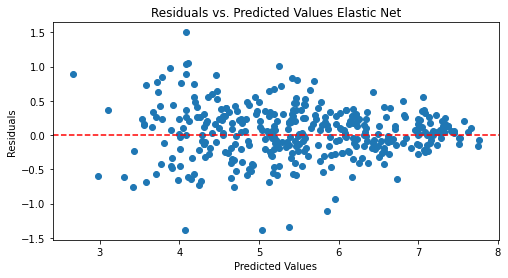

In [51]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicteda Values Elastic Net")
plt.axhline(0, color='red', linestyle='--')
plt.show()

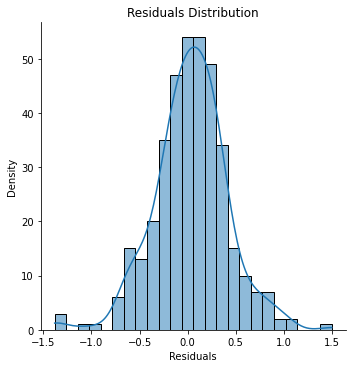

In [53]:
sns.displot(residuals,kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Density")  
plt.show()

The residuals of the regression model appear to follow a normal distribution, as evidenced by the distribution plot. This is a positive sign as it indicates that the model's errors are approximately normally distributed, which aligns with one of the key assumptions of linear regression. A normal distribution of residuals implies that the model is capturing the underlying patterns in the data well, and the errors are random and symmetrically distributed around zero. This suggests that the model is making predictions with a relatively consistent level of accuracy across the range of target values, enhancing its reliability for predictive purposes. However, it's important to conduct further diagnostic checks, such as examining residual plots and statistical tests, to validate the model's assumptions thoroughly.

# Steps to create a better model

In [82]:
df_new=pd.read_csv('happiness_data.csv')

In [83]:
df_new['Generosity'] = df_new.groupby('Country name')['Generosity'].transform(lambda x: x.fillna(x.mean()))
df_new['Freedom to make life choices'] = df_new.groupby('Country name')['Freedom to make life choices'].transform(lambda x: x.fillna(x.mean()))
df_new['Perceptions of corruption'] = df_new.groupby('Country name')['Perceptions of corruption'].transform(lambda x: x.fillna(x.mean()))
df_new['Positive affect']=df_new.groupby('Country name')['Positive affect'].transform(lambda x: x.fillna(x.mean()))
df_new['Negative affect']=df_new.groupby('Country name')['Negative affect'].transform(lambda x: x.fillna(x.mean()))
df_new['Healthy life expectancy at birth']=df_new.groupby('Country name')['Healthy life expectancy at birth'].transform(lambda x: x.fillna(x.mean()))
df_new['Log GDP per capita']=df_new.groupby('Country name')['Log GDP per capita'].transform(lambda x: x.fillna(x.mean()))
df_new['Social support']=df_new.groupby('Country name')['Social support'].transform(lambda x: x.fillna(x.mean()))


In [84]:
df_new.dropna(inplace=True)

In [86]:
X = df_new.drop(columns=['Life Ladder','Country name','year'])
y = df_new['Life Ladder']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [87]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) 
feature_sel_model.fit(X_train, y_train)
SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)
feature_sel_model.get_support()
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))


total features: 8
selected features: 7
features with coefficients shrank to zero: 1


In [88]:
selected_feat

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect'],
      dtype='object')

# Using Robust Models

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

xgb_reg = XGBRegressor()
xgb_scores = cross_val_score(xgb_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
xgb_rmse_scores = np.sqrt(-xgb_scores)
print("XGBoost Regressor RMSE Scores:", xgb_rmse_scores)
print("Mean RMSE (XGBoost Regressor):", xgb_rmse_scores.mean())

# Decision Tree Regressor
dt_reg = DecisionTreeRegressor()
dt_scores = cross_val_score(dt_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
dt_rmse_scores = np.sqrt(-dt_scores)
print("Decision Tree Regressor RMSE Scores:", dt_rmse_scores)
print("Mean RMSE (Decision Tree Regressor):", dt_rmse_scores.mean())

# Random Forest Regressor
rf_reg = RandomForestRegressor()
rf_scores = cross_val_score(rf_reg, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest Regressor RMSE Scores:", rf_rmse_scores)
print("Mean RMSE (Random Forest Regressor):", rf_rmse_scores.mean())


XGBoost Regressor RMSE Scores: [0.3987944  0.40558506 0.39423498 0.39237354]
Mean RMSE (XGBoost Regressor): 0.39774699395687313
Decision Tree Regressor RMSE Scores: [0.5259997  0.51337826 0.54688656 0.52091408]
Mean RMSE (Decision Tree Regressor): 0.5267946516474218
Random Forest Regressor RMSE Scores: [0.38529032 0.38424079 0.39889409 0.3743913 ]
Mean RMSE (Random Forest Regressor): 0.38570412320021175



DecisionTreeRegressor, RandomForestRegressor, and XGBoostRegressor are considered robust models for regression tasks, and they have certain advantages over regularized linear models like Ridge, Lasso, and ElasticNet. Here's why they are often preferred:

Non-Linearity Handling: Decision trees and ensemble methods (Random Forest and XGBoost) can capture complex non-linear relationships in the data. They are not limited by the assumption of linearity, which is inherent in linear regression models. This makes them suitable for modeling data with intricate patterns.

Feature Importance: Tree-based models provide feature importance scores, which indicate the contribution of each feature to the model's predictions. This is valuable for feature selection because it directly tells which features are the most relevant for the problem.

Robust to Outliers: Tree-based models are robust to outliers. They partition the feature space into regions and are less sensitive to individual data points that deviate from the majority of the data. Linear models can be heavily influenced by outliers, leading to biased estimates.

# Other ways to improve the Linear Regression Model

Outlier Handling: Identify and handle outliers in our dataset. Outliers can significantly impact linear regression models. We can either remove outliers, transform the target variable (e.g., log transformation), or use robust regression techniques to mitigate their impact.

Multicollinearity: Check for multicollinearity among the features. High multicollinearity can make it difficult to interpret the significance of individual features. We may need to remove correlated features or consider techniques like Principal Component Analysis (PCA).

Model Selection: Experiment with different regression algorithms. While linear regression is simple and interpretable, more complex models like Decision Trees, Random Forests, Gradient Boosting, or even Neural Networks might capture complex relationships better.

Hyperparameter Tuning: Tune hyperparameters of the chosen model(s) using techniques like grid search or random search. For linear regression, this may involve selecting the regularization strength (alpha/lambda) for Ridge, Lasso, or Elastic Net regression.